In [1]:
!git clone 'https://github.com/metemu/COVID19'

Cloning into 'COVID19'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 230 (delta 31), reused 20 (delta 6), pack-reused 162
Receiving objects: 100% (230/230), 4.21 MiB | 7.28 MiB/s, done.
Resolving deltas: 100% (119/119), done.


In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

# CoronaVirus Prediction

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd
url1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url1, error_bad_lines=False)
#confirmed = confirmed.drop(confirmed.columns[0], axis=1)
confirmed.drop_duplicates(subset ="Country/Region", keep = 'last', inplace = True)
countries = ['Brazil', 'Germany', 'Italy', 'Iran', 'Turkey', 'Ukraine']
confirmed = confirmed[confirmed['Country/Region'].isin(countries)]
#confirmed.to_csv('./confirmed.csv')
url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url2, error_bad_lines=False)
#death = death.drop(death.columns[0], axis=1)
death.drop_duplicates(subset ="Country/Region", keep = 'last', inplace = True)
death = death[death['Country/Region'].isin(countries)]
#death.to_csv('./death.csv')
url3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url3, error_bad_lines=False)
#recover = recover.drop(recover.columns[0], axis=1)
recover.drop_duplicates(subset ="Country/Region", keep = 'last', inplace = True)
recover = recover[recover['Country/Region'].isin(countries)]
#recover.to_csv('./recover.csv')

## Get Population

In [5]:
population=pd.read_csv('https://raw.githubusercontent.com/metemu/COVID19/master/population.csv', sep=',', encoding='latin1') 
population.iloc[:,:]

,Province/State,Country/Region,Population
0,NaN,Brazil,"210,147,125"
1,NaN,Germany,"83,149,300"
2,NaN,Iran,"79,966,230"
3,NaN,Italy,"60,317,000"
4,NaN,Turkey,"82,003,882"
5,NaN,Ukraine,"43,733,762"


In [0]:
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [7]:
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:5,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,Population,region
0,NaN,Brazil,-14.2350,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,135773,146894,156061,162699,169594,178214,190137,203165,220291,233511,241080,255368,271885,291579,310087,330890,347398,363211,374898,391222,411821,438238,465166,498440,514849,526447,555383,584016,614941,645771,672846,691758,707412,739503,772416,802828,828810,850514,"210,147,125",Brazil_nan
1,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,...,169430,170588,171324,171879,172576,173171,174098,174478,175233,175752,176369,176551,177778,178473,179021,179710,179986,180328,180600,181200,181524,182196,182922,183189,183410,183594,183879,184121,184472,184924,185450,185750,186109,186506,186522,186691,187226,187267,"83,149,300",Germany_nan
2,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,18,28,43,61,95,139,...,103135,104691,106220,107603,109286,110767,112725,114533,116635,118392,120198,122492,124603,126949,129341,131652,133521,135701,137724,139511,141591,143849,146668,148950,151466,154445,157562,160696,164270,167156,169425,171789,173832,175927,177938,180156,182525,184955,"79,966,230",Iran_nan
3,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,...,215858,217185,218268,219070,219814,221216,222104,223096,223885,224760,225435,225886,226699,227364,228006,228658,229327,229858,230158,230555,231139,231732,232248,232664,232997,233197,233515,233836,234013,234531,234801,234998,235278,235561,235763,236142,236305,236651,"60,317,000",Italy_nan
4,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,133721,135569,137115,138657,139771,141475,143114,144749,146457,148067,149435,150593,151615,152587,153548,154500,155686,156827,157814,158762,159797,160979,162120,163103,163942,164769,165555,166422,167410,168340,169218,170132,171121,172114,173036,174023,175218,176677,"82,003,882",Turkey_nan


In [0]:
#!pip install qwikidata
#import qwikidata
#import qwikidata.sparql
###################################################### This was already done ####################################################
#def get_city_wikidata(city, country):
#    query = """
#    SELECT ?city ?cityLabel ?country ?countryLabel ?population
#    WHERE
#    {
#     ?city rdfs:label '%s'@en.
#     ?city wdt:P1082 ?population.
#     ?city wdt:P17 ?country.
#     ?city rdfs:label ?cityLabel.
#     ?country rdfs:label ?countryLabel.
#     FILTER(LANG(?cityLabel) = "en").
#     FILTER(LANG(?countryLabel) = "en").
#     FILTER(CONTAINS(?countryLabel, "%s")).
#    }
#    """ % (city, country)
#    res = qwikidata.sparql.return_sparql_query_results(query)
#    out = res['results']['bindings'][0]
#    return out

In [0]:
#get_city_wikidata('Turkey', 'Turkey')

In [10]:
"""
pop = []
# Get the population of the city
for i in range(0,len(confirmed)):
  try:
    t=get_city_wikidata(confirmed.iloc[i,1],confirmed.iloc[i,1])
    t={key: t[key] for key in t.keys()&{'population'}} 
    t=list(t.values())
    print(confirmed.iloc[i,1],t[0]['value'])
    pop.append(t[0]['value'])
  except Exception:
    print (confirmed.iloc[i,1],'Error')
    pop.append(t[0]['value'])
"""

"\npop = []\n# Get the population of the city\nfor i in range(0,len(confirmed)):\n  try:\n    t=get_city_wikidata(confirmed.iloc[i,1],confirmed.iloc[i,1])\n    t={key: t[key] for key in t.keys()&{'population'}} \n    t=list(t.values())\n    print(confirmed.iloc[i,1],t[0]['value'])\n    pop.append(t[0]['value'])\n  except Exception:\n    print (confirmed.iloc[i,1],'Error')\n    pop.append(t[0]['value'])\n"

In [11]:
"""
for i in range(0, len(pop)): 
    pop[i] = int(pop[i])
"""

'\nfor i in range(0, len(pop)): \n    pop[i] = int(pop[i])\n'

In [12]:
"""
confirmed['population']=pop
death['population']=pop
recover['population']=pop
"""

"\nconfirmed['population']=pop\ndeath['population']=pop\nrecover['population']=pop\n"

In [13]:
"""
# merge region
confirmed['region']=confirmed['Country/Region'].map(str)
death['region']=death['Country/Region'].map(str)
recover['region']=recover['Country/Region'].map(str)
confirmed.iloc[:,:]
"""

"\n# merge region\nconfirmed['region']=confirmed['Country/Region'].map(str)\ndeath['region']=death['Country/Region'].map(str)\nrecover['region']=recover['Country/Region'].map(str)\nconfirmed.iloc[:,:]\n"

## Create Time Series + Plots

In [0]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:
ts=create_ts(confirmed)
ts_d=create_ts(death)
ts_rec=create_ts(recover)
ts.tail()

region,Brazil_nan,Germany_nan,Iran_nan,Italy_nan,Turkey_nan,Ukraine_nan
6/9/20,739503,186506,175927,235561,172114,28479
6/10/20,772416,186522,177938,235763,173036,29015
6/11/20,802828,186691,180156,236142,174023,29706
6/12/20,828810,187226,182525,236305,175218,30415
6/13/20,850514,187267,184955,236651,176677,31177


Text(0.5, 1.0, 'Daily Total Recoverd - Major areas')

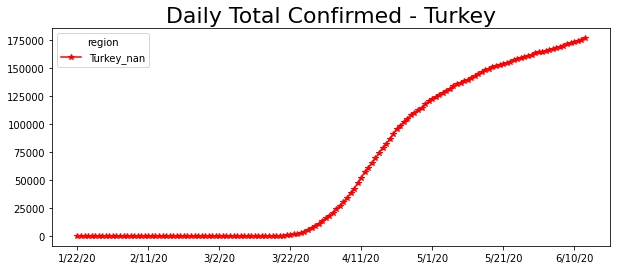

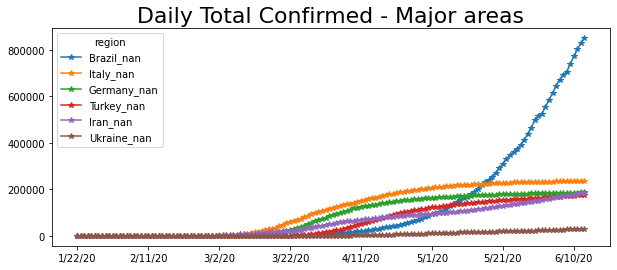

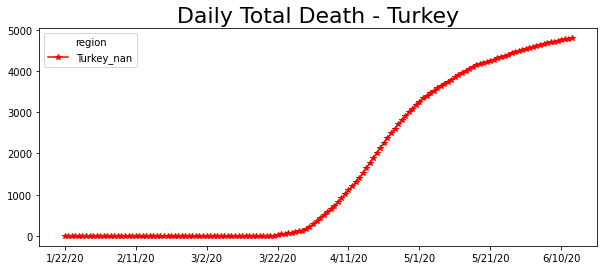

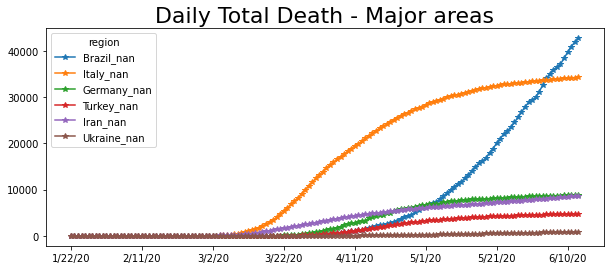

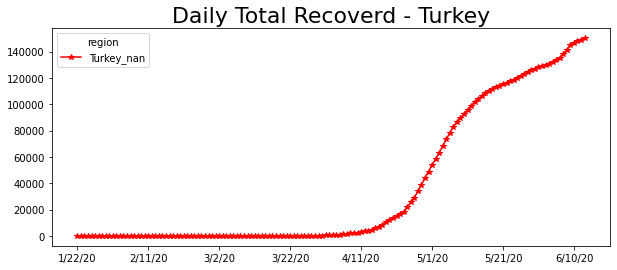

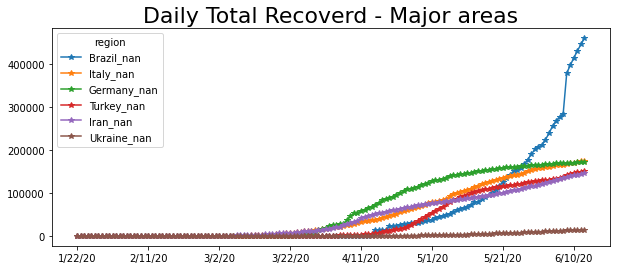

In [16]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p.iloc[:,3:4].plot(marker='*',color='red', figsize=(10,4)).set_title('Daily Total Confirmed - Turkey',fontdict={'fontsize': 22})
p.iloc[:,:].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Major areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,3:4].plot(marker='*',color='red',figsize=(10,4)).set_title('Daily Total Death - Turkey',fontdict={'fontsize': 22})
p_d.iloc[:,:].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Major areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,3:4].plot(marker='*',color='red',figsize=(10,4)).set_title('Daily Total Recoverd - Turkey',fontdict={'fontsize': 22})
p_r.iloc[:,:].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Major areas',fontdict={'fontsize': 22})

## Kalman Filter With R

In [0]:
# Confirmed Case data for R script
ts_rconf=ts.reset_index()
ts_rconf=ts_rconf.rename(columns = {'index':'date'})
ts_rconf['date']=pd.to_datetime(ts_rconf['date'] ,errors ='coerce')
ts_rconf.to_csv(r'./ts_rconf.csv')

In [0]:
# Death data for R script
ts_rdeath=ts_d.reset_index()
ts_rdeath=ts_rdeath.rename(columns = {'index':'date'})
ts_rdeath['date']=pd.to_datetime(ts_rdeath['date'] ,errors ='coerce')
ts_rdeath.to_csv(r'./ts_rdeath.csv')

In [0]:
# Recovered data for R script
ts_rrec=ts_rec.reset_index()
ts_rrec=ts_rrec.rename(columns = {'index':'date'})
ts_rrec['date']=pd.to_datetime(ts_rrec['date'] ,errors ='coerce')
ts_rrec.to_csv(r'./ts_rrec.csv')

In [20]:
ts_rconf.tail()

region,date,Brazil_nan,Germany_nan,Iran_nan,Italy_nan,Turkey_nan,Ukraine_nan
139,2020-06-09,739503,186506,175927,235561,172114,28479
140,2020-06-10,772416,186522,177938,235763,173036,29015
141,2020-06-11,802828,186691,180156,236142,174023,29706
142,2020-06-12,828810,187226,182525,236305,175218,30415
143,2020-06-13,850514,187267,184955,236651,176677,31177


In [0]:
import rpy2
%load_ext rpy2.ipython

In [22]:
%%R
install.packages('pracma')
install.packages('reshape')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('tidyverse')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pracma_2.2.9.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 400551 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [23]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv('/content/ts_rconf.csv')
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  X1 = col_double(),
  date = col_date(format = ""),
  Brazil_nan = col_double(),
  Germany_nan = col_double(),
  Iran_nan = col_double(),
  Italy_nan = col_double(),
  Turkey_nan = col_double(),
  Ukraine_nan = col_double()
)



In [0]:
pconf=%R pred_all

In [25]:
############ Merge R output due to package problem
tconf=ts #confirmed
tconf=tconf.stack().reset_index(name='confirmed')
tconf.columns=['date', 'region','confirmed']
tconf['date']=pd.to_datetime(tconf['date'] ,errors ='coerce')
tconf=tconf.sort_values(['region', 'date'])

tempconf=tconf.iloc[:,:3]
tempconf=tempconf.reset_index(drop=True)
for i in range(1,len(tconf)+1):
  if(tempconf.iloc[i,1] is not tempconf.iloc[i-1,1]):
    tempconf.loc[len(tempconf)+1] = [tempconf.iloc[i-1,0]+ pd.DateOffset(1),tempconf.iloc[i-1,1], 0] 
tempconf=tempconf.sort_values(['region', 'date'])
tempconf=tempconf.reset_index(drop=True)
tempconf['Y']=pconf['Y']
tempconf['X']=pconf['X']
tempconf['X2']=pconf['X2']

tconf.tail(20)

,date,region,confirmed
749,2020-05-25,Ukraine_nan,21245
755,2020-05-26,Ukraine_nan,21584
761,2020-05-27,Ukraine_nan,21905
767,2020-05-28,Ukraine_nan,22382
773,2020-05-29,Ukraine_nan,22811
779,2020-05-30,Ukraine_nan,23204
785,2020-05-31,Ukraine_nan,23672
791,2020-06-01,Ukraine_nan,24562
797,2020-06-02,Ukraine_nan,24895
803,2020-06-03,Ukraine_nan,25385


In [0]:
pconf.reset_index(inplace=True) #reset index to start it from '0' instead of '1'

In [0]:
del pconf['index'] #delete index column

In [0]:
tempconf['Y']=pconf['Y']
tempconf['X']=pconf['X']
tempconf['X2']=pconf['X2']

In [29]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv('/content/ts_rdeath.csv')
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: Metrics

R[write to console]: Parsed with column specification:
cols(
  X1 = col_double(),
  date = col_date(format = ""),
  Brazil_nan = col_double(),
  Germany_nan = col_double(),
  Iran_nan = col_double(),
  Italy_nan = col_double(),
  Turkey_nan = col_double(),
  Ukraine_nan = col_double()
)



In [0]:
pdeath=%R pred_all

In [31]:
############ Merge R output due to package problem
tdeath=ts_d #death
tdeath=tdeath.stack().reset_index(name='death')
tdeath.columns=['date', 'region','death']
tdeath['date']=pd.to_datetime(tdeath['date'] ,errors ='coerce')
tdeath=tdeath.sort_values(['region', 'date'])

tempdeath=tdeath.iloc[:,:3]
tempdeath=tempdeath.reset_index(drop=True)
for i in range(1,len(tdeath)+1):
  if(tempdeath.iloc[i,1] is not tempdeath.iloc[i-1,1]):
    tempdeath.loc[len(tempdeath)+1] = [tempdeath.iloc[i-1,0]+ pd.DateOffset(1),tempdeath.iloc[i-1,1], 0] 
tempdeath=tempdeath.sort_values(['region', 'date'])
tempdeath=tempdeath.reset_index(drop=True)
tempdeath['Y']=pdeath['Y']
tempdeath['X']=pdeath['X']
tempdeath['X2']=pdeath['X2']

tdeath.tail(20)

,date,region,death
749,2020-05-25,Ukraine_nan,623
755,2020-05-26,Ukraine_nan,644
761,2020-05-27,Ukraine_nan,658
767,2020-05-28,Ukraine_nan,669
773,2020-05-29,Ukraine_nan,679
779,2020-05-30,Ukraine_nan,696
785,2020-05-31,Ukraine_nan,708
791,2020-06-01,Ukraine_nan,724
797,2020-06-02,Ukraine_nan,733
803,2020-06-03,Ukraine_nan,742


In [0]:
pdeath.reset_index(inplace=True) #reset index to start it from '0' instead of '1'

In [0]:
del pdeath['index'] #delete index column

In [0]:
tempdeath['Y']=pdeath['Y']
tempdeath['X']=pdeath['X']
tempdeath['X2']=pdeath['X2']

In [35]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv('/content/ts_rrec.csv')
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: Metrics

R[write to console]: Parsed with column specification:
cols(
  X1 = col_double(),
  date = col_date(format = ""),
  Brazil_nan = col_double(),
  Germany_nan = col_double(),
  Iran_nan = col_double(),
  Italy_nan = col_double(),
  Turkey_nan = col_double(),
  Ukraine_nan = col_double()
)



In [0]:
prec=%R pred_all

In [37]:
############ Merge R output due to package problem
trec=ts_rec #recovered
trec=trec.stack().reset_index(name='recovered')
trec.columns=['date', 'region','recovered']
trec['date']=pd.to_datetime(trec['date'] ,errors ='coerce')
trec=trec.sort_values(['region', 'date'])

temprec=trec.iloc[:,:3]
temprec=temprec.reset_index(drop=True)
for i in range(1,len(trec)+1):
  if(temprec.iloc[i,1] is not temprec.iloc[i-1,1]):
    temprec.loc[len(temprec)+1] = [temprec.iloc[i-1,0]+ pd.DateOffset(1),temprec.iloc[i-1,1], 0] 
temprec=temprec.sort_values(['region', 'date'])
temprec=temprec.reset_index(drop=True)
temprec['Y']=prec['Y']
temprec['X']=prec['X']
temprec['X2']=prec['X2']

trec.tail(20)

,date,region,recovered
749,2020-05-25,Ukraine_nan,7234
755,2020-05-26,Ukraine_nan,7575
761,2020-05-27,Ukraine_nan,7995
767,2020-05-28,Ukraine_nan,8439
773,2020-05-29,Ukraine_nan,8934
779,2020-05-30,Ukraine_nan,9311
785,2020-05-31,Ukraine_nan,9538
791,2020-06-01,Ukraine_nan,10053
797,2020-06-02,Ukraine_nan,10461
803,2020-06-03,Ukraine_nan,10838


In [0]:
prec.reset_index(inplace=True) #reset index to start it from '0' instead of '1'

In [0]:
del prec['index'] #delete index column

In [0]:
temprec['Y']=prec['Y']
temprec['X']=prec['X']
temprec['X2']=prec['X2']

## Pre Proccessing Data for ML Model

### Extract Weather Data

In [0]:
#!pip install pyweatherbit

In [42]:
"""
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 
#api_key = "26141d374d8e49d0a2e1f1254428ce8e"
#api_key ="f206579c74644c4b96a2423cb56a1687"
#api_key ="81a581ac823849f38427fb5081cb8df8"
api_key ="5381dd8ba9794927875d0c7764b895ab"

api = Api(api_key)
api.set_granularity('daily')

# Set the granularity of the API - Options: ['daily','hourly','3hourly']
# Will only affect forecast requests.
#api.get_forecast(lat=lat, lon=lon)
"""

'\nfrom weatherbit.api import Api\nimport json  \nimport pandas as pd  \nfrom pandas.io.json import json_normalize \n#api_key = "26141d374d8e49d0a2e1f1254428ce8e"\n#api_key ="f206579c74644c4b96a2423cb56a1687"\n#api_key ="81a581ac823849f38427fb5081cb8df8"\napi_key ="5381dd8ba9794927875d0c7764b895ab"\n\napi = Api(api_key)\napi.set_granularity(\'daily\')\n\n# Set the granularity of the API - Options: [\'daily\',\'hourly\',\'3hourly\']\n# Will only affect forecast requests.\n#api.get_forecast(lat=lat, lon=lon)\n'

###Weather History

In [43]:
"""
################## already done since API is limited to 500 call per day

w=pd.DataFrame(columns=['date','region','min','max'])
for i in range (0,len(confirmed)):
  start_date=pd.to_datetime('2020-01-22')
  for j in range (4,confirmed.shape[1]-2):
    jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date.strftime('%Y-%m-%d'),end_date=(start_date+ pd.DateOffset(days=1)).strftime('%Y-%m-%d')).json
    # j=json_normalize(j)
    # j=j['data']
    # max_temp=json_normalize(j['data'])['max_temp'].values[0] # max
    # min_temp=json_normalize(j['data'])['min_temp'].values[0]
    try:
      w=w.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
    except Exception:
      w=w.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':None,'max':None}, ignore_index=True)
    start_date=start_date+ pd.DateOffset(days=1)
    w.to_csv('/content/drive/My Drive/w.csv')
"""

"\n################## already done since API is limited to 500 call per day\n\nw=pd.DataFrame(columns=['date','region','min','max'])\nfor i in range (0,len(confirmed)):\n  start_date=pd.to_datetime('2020-01-22')\n  for j in range (4,confirmed.shape[1]-2):\n    jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date.strftime('%Y-%m-%d'),end_date=(start_date+ pd.DateOffset(days=1)).strftime('%Y-%m-%d')).json\n    # j=json_normalize(j)\n    # j=j['data']\n    # max_temp=json_normalize(j['data'])['max_temp'].values[0] # max\n    # min_temp=json_normalize(j['data'])['min_temp'].values[0]\n    try:\n      w=w.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)\n    except Exception:\n      w=w.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':None,'max'

In [44]:
"""
################## Update Recent Day Weather

w_update=pd.DataFrame(columns=['date','region','min','max'])
for i in range (28,len(confirmed)):
  start_date=pd.to_datetime('2020-05-27')
  for j in range (confirmed.shape[1]-4,confirmed.shape[1]-2):
    jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date.strftime('%Y-%m-%d'),end_date=(start_date+ pd.DateOffset(days=1)).strftime('%Y-%m-%d')).json
    try:
      w_update=w_update.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
    except Exception:
      w_update=w_update.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':None,'max':None}, ignore_index=True)
    start_date=start_date+ pd.DateOffset(days=1)
"""

"\n################## Update Recent Day Weather\n\nw_update=pd.DataFrame(columns=['date','region','min','max'])\nfor i in range (28,len(confirmed)):\n  start_date=pd.to_datetime('2020-05-27')\n  for j in range (confirmed.shape[1]-4,confirmed.shape[1]-2):\n    jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date.strftime('%Y-%m-%d'),end_date=(start_date+ pd.DateOffset(days=1)).strftime('%Y-%m-%d')).json\n    try:\n      w_update=w_update.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)\n    except Exception:\n      w_update=w_update.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':None,'max':None}, ignore_index=True)\n    start_date=start_date+ pd.DateOffset(days=1)\n"

In [0]:
#w_update.to_csv(r'/content/drive/My Drive/w_update.csv')

### Extract Weather Forecast Data

In [46]:
"""
################## Forecast Weather With API - Already Done
#forecast = api.get_forecast(lat=lat, lon=lon)

w_forecast=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
for i in range (0,len(confirmed)):
    jas=api.get_forecast(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3]).json
    jas=json_normalize(jas['data'])[['datetime','min_temp','max_temp']]
    try:
      w_forecast_temp=jas
      w_forecast_temp['region']=confirmed.iloc[i,confirmed.shape[1]-1]
    except Exception:
      w_forecast_temp=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
    w_forecast=w_forecast.append(w_forecast_temp)
w_forecast=w_forecast[['datetime','region','min_temp','max_temp']]
w_forecast.columns = ['date', 'region', 'min', 'max']
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%Y-%m-%d')
w_forecast.to_csv('/content/drive/My Drive/w_forecast.csv')
"""

"\n################## Forecast Weather With API - Already Done\n#forecast = api.get_forecast(lat=lat, lon=lon)\n\nw_forecast=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])\nfor i in range (0,len(confirmed)):\n    jas=api.get_forecast(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3]).json\n    jas=json_normalize(jas['data'])[['datetime','min_temp','max_temp']]\n    try:\n      w_forecast_temp=jas\n      w_forecast_temp['region']=confirmed.iloc[i,confirmed.shape[1]-1]\n    except Exception:\n      w_forecast_temp=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])\n    w_forecast=w_forecast.append(w_forecast_temp)\nw_forecast=w_forecast[['datetime','region','min_temp','max_temp']]\nw_forecast.columns = ['date', 'region', 'min', 'max']\nw_forecast['date']=pd.to_datetime(w_forecast['date'],format='%Y-%m-%d')\nw_forecast.to_csv('/content/drive/My Drive/w_forecast.csv')\n"

In [0]:
w=pd.read_csv('https://raw.githubusercontent.com/metemu/COVID19/master/w.csv', sep=',', encoding='latin1')
w = w.drop(w.columns[0], axis=1)
w['date']=pd.to_datetime(w['date'],format='%m/%d/%y')
#w['date']=pd.to_datetime(w['date'],errors ='coerce')

w_forecast=pd.read_csv('https://raw.githubusercontent.com/metemu/COVID19/master/w_forecast.csv', sep=',', encoding='latin1')
w_forecast = w_forecast.drop(w_forecast.columns[0], axis=1)
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%Y/%m/%d')

In [48]:
w_forecast.loc[w_forecast['region'] == 'Turkey_nan']

,date,region,min,max
64,2020-06-14,Turkey_nan,14.5,20.7
65,2020-06-15,Turkey_nan,11.3,24.4
66,2020-06-16,Turkey_nan,13.8,25.4
67,2020-06-17,Turkey_nan,12.8,26.9
68,2020-06-18,Turkey_nan,12.4,28.1
69,2020-06-19,Turkey_nan,12.3,27.4
70,2020-06-20,Turkey_nan,11.4,23.1
71,2020-06-21,Turkey_nan,12.7,23.0
72,2020-06-22,Turkey_nan,11.4,25.1
73,2020-06-23,Turkey_nan,15.2,29.2


### Build Train Set Data Structure

In [0]:
tconf=ts #confirmed
tconf=tconf.stack().reset_index(name='confirmed')
tconf.columns=['date', 'region','confirmed']
tconf['date']=pd.to_datetime(tconf['date'] ,errors ='coerce')
tconf=tconf.sort_values(['region', 'date'])

# Add 1 Future day for prediction
tconf=tconf.reset_index(drop=True)
for i in range(1,len(tconf)+1):
  if(tconf.iloc[i,1] is not tconf.iloc[i-1,1]):
    tconf.loc[len(tconf)+1] = [tconf.iloc[i-1,0]+ pd.DateOffset(1),tconf.iloc[i-1,1], 0] 
tconf=tconf.sort_values(['region', 'date'])
tconf=tconf.reset_index(drop=True)

In [0]:
tdeath=ts_d #death
tdeath=tdeath.stack().reset_index(name='death')
tdeath.columns=['date', 'region','death']
tdeath['date']=pd.to_datetime(tdeath['date'] ,errors ='coerce')
tdeath=tdeath.sort_values(['region', 'date'])

# Add 1 Future day for prediction
tdeath=tdeath.reset_index(drop=True)
for i in range(1,len(tdeath)+1):
  if(tdeath.iloc[i,1] is not tdeath.iloc[i-1,1]):
    tdeath.loc[len(tdeath)+1] = [tdeath.iloc[i-1,0]+ pd.DateOffset(1),tdeath.iloc[i-1,1], 0] 
tdeath=tdeath.sort_values(['region', 'date'])
tdeath=tdeath.reset_index(drop=True)

In [0]:
trec=ts_rec #recovered
trec=trec.stack().reset_index(name='recover')
trec.columns=['date', 'region','recover']
trec['date']=pd.to_datetime(trec['date'] ,errors ='coerce')
trec=trec.sort_values(['region', 'date'])

# Add 1 Future day for prediction
trec=trec.reset_index(drop=True)
for i in range(1,len(trec)+1):
  if(trec.iloc[i,1] is not trec.iloc[i-1,1]):
    trec.loc[len(trec)+1] = [trec.iloc[i-1,0]+ pd.DateOffset(1),trec.iloc[i-1,1], 0] 
trec=trec.sort_values(['region', 'date'])
trec=trec.reset_index(drop=True)

In [52]:
tconf.tail(7)

,date,region,confirmed
863,2020-06-08,Ukraine_nan,28077
864,2020-06-09,Ukraine_nan,28479
865,2020-06-10,Ukraine_nan,29015
866,2020-06-11,Ukraine_nan,29706
867,2020-06-12,Ukraine_nan,30415
868,2020-06-13,Ukraine_nan,31177
869,2020-06-14,Ukraine_nan,0


In [0]:
tconf['1_day_change']=tconf['3_day_change']=tconf['7_day_change']=tconf['1_day_change_rate']=tconf['3_day_change_rate']=tconf['7_day_change_rate']=tconf['last_day']=0
for i in range(1,len(tconf)):
  if(tconf.iloc[i,1] is tconf.iloc[i-2,1]):
    tconf.iloc[i,3]=tconf.iloc[i-1,2]-tconf.iloc[i-2,2]
    tconf.iloc[i,6]=(tconf.iloc[i-1,2]/tconf.iloc[i-2,2]-1)*100
    tconf.iloc[i,9]=tconf.iloc[i-1,2]
  if(tconf.iloc[i,1] is tconf.iloc[i-4,1]):
    tconf.iloc[i,4]=tconf.iloc[i-1,2]-tconf.iloc[i-4,2]
    tconf.iloc[i,7]=(tconf.iloc[i-1,2]/tconf.iloc[i-4,2]-1)*100
  if(tconf.iloc[i,1] is tconf.iloc[i-8,1]):
    tconf.iloc[i,5]=tconf.iloc[i-1,2]-tconf.iloc[i-8,2]
    tconf.iloc[i,8]=(tconf.iloc[i-1,2]/tconf.iloc[i-8,2]-1)*100
tconf=tconf.fillna(0)  
tconf=tconf.merge(tempconf[['date','region', 'X']],how='left',on=['date','region'])
tconf=tconf.rename(columns = {'X':'kalman_prediction'}) 
tconf=tconf.replace([np.inf, -np.inf], 0)
tconf['kalman_prediction']=round(tconf['kalman_prediction'])
trainconf=tconf.merge(confirmed[['region',' Population ']],how='left',on='region')
trainconf=trainconf.rename(columns = {' Population ':'population'})
trainconf['population']=trainconf['population'].str.replace(r" ", '')
trainconf['population']=trainconf['population'].str.replace(r",", '')
trainconf['population']=trainconf['population'].fillna(1)
trainconf['population']=trainconf['population'].astype('int32')
trainconf['infected_rate'] =trainconf['last_day']/trainconf['population']*10000
trainconf=trainconf.merge(w,how='left',on=['date','region'])
trainconf=trainconf.sort_values(['region', 'date'])
### fill missing weather 
# for i in range(0,len(trainconf)):
#   if(np.isnan(trainconf.iloc[i,13])):
#     if(trainconf.iloc[i,1] is train.iloc[i-1,1]):
#       trainconf.iloc[i,13]=trainconf.iloc[i-1,13]
#       trainconf.iloc[i,14]=trainconf.iloc[i-1,14]

In [0]:
tdeath['1_day_change']=tdeath['3_day_change']=tdeath['7_day_change']=tdeath['1_day_change_rate']=tdeath['3_day_change_rate']=tdeath['7_day_change_rate']=tdeath['last_day']=0
for i in range(1,len(tdeath)):
  if(tdeath.iloc[i,1] is tdeath.iloc[i-2,1]):
    tdeath.iloc[i,3]=tdeath.iloc[i-1,2]-tdeath.iloc[i-2,2]
    tdeath.iloc[i,6]=(tdeath.iloc[i-1,2]/tdeath.iloc[i-2,2]-1)*100
    tdeath.iloc[i,9]=tdeath.iloc[i-1,2]
  if(tdeath.iloc[i,1] is tdeath.iloc[i-4,1]):
    tdeath.iloc[i,4]=tdeath.iloc[i-1,2]-tdeath.iloc[i-4,2]
    tdeath.iloc[i,7]=(tdeath.iloc[i-1,2]/tdeath.iloc[i-4,2]-1)*100
  if(tdeath.iloc[i,1] is tdeath.iloc[i-8,1]):
    tdeath.iloc[i,5]=tdeath.iloc[i-1,2]-tdeath.iloc[i-8,2]
    tdeath.iloc[i,8]=(tdeath.iloc[i-1,2]/tdeath.iloc[i-8,2]-1)*100
tdeath=tdeath.fillna(0)  
tdeath=tdeath.merge(tempdeath[['date','region', 'X']],how='left',on=['date','region'])
tdeath=tdeath.rename(columns = {'X':'kalman_prediction'}) 
tdeath=tdeath.replace([np.inf, -np.inf], 0)
tdeath['kalman_prediction']=round(tdeath['kalman_prediction'])
traindeath=tdeath.merge(death[['region',' Population ']],how='left',on='region')
traindeath=traindeath.rename(columns = {' Population ':'population'})
traindeath['population']=traindeath['population'].str.replace(r" ", '')
traindeath['population']=traindeath['population'].str.replace(r",", '')
traindeath['population']=traindeath['population'].fillna(1)
traindeath['population']=traindeath['population'].astype('int32')
traindeath['infected_rate'] =traindeath['last_day']/traindeath['population']*10000
traindeath=traindeath.merge(w,how='left',on=['date','region'])
traindeath=traindeath.sort_values(['region', 'date'])
### fill missing weather 
# for i in range(0,len(traindeath)):
#   if(np.isnan(traindeath.iloc[i,13])):
#     if(traindeath.iloc[i,1] is train.iloc[i-1,1]):
#       traindeath.iloc[i,13]=traindeath.iloc[i-1,13]
#       traindeath.iloc[i,14]=traindeath.iloc[i-1,14]

In [0]:
trec['1_day_change']=trec['3_day_change']=trec['7_day_change']=trec['1_day_change_rate']=trec['3_day_change_rate']=trec['7_day_change_rate']=trec['last_day']=0
for i in range(1,len(trec)):
  if(trec.iloc[i,1] is trec.iloc[i-2,1]):
    trec.iloc[i,3]=trec.iloc[i-1,2]-trec.iloc[i-2,2]
    trec.iloc[i,6]=(trec.iloc[i-1,2]/trec.iloc[i-2,2]-1)*100
    trec.iloc[i,9]=trec.iloc[i-1,2]
  if(trec.iloc[i,1] is trec.iloc[i-4,1]):
    trec.iloc[i,4]=trec.iloc[i-1,2]-trec.iloc[i-4,2]
    trec.iloc[i,7]=(trec.iloc[i-1,2]/trec.iloc[i-4,2]-1)*100
  if(trec.iloc[i,1] is trec.iloc[i-8,1]):
    trec.iloc[i,5]=trec.iloc[i-1,2]-trec.iloc[i-8,2]
    trec.iloc[i,8]=(trec.iloc[i-1,2]/trec.iloc[i-8,2]-1)*100
trec=trec.fillna(0)  
trec=trec.merge(temprec[['date','region', 'X']],how='left',on=['date','region'])
trec=trec.rename(columns = {'X':'kalman_prediction'}) 
trec=trec.replace([np.inf, -np.inf], 0)
trec['kalman_prediction']=round(trec['kalman_prediction'])
trainrec=trec.merge(recover[['region',' Population ']],how='left',on='region')
trainrec=trainrec.rename(columns = {' Population ':'population'})
trainrec['population']=trainrec['population'].str.replace(r" ", '')
trainrec['population']=trainrec['population'].str.replace(r",", '')
trainrec['population']=trainrec['population'].fillna(1)
trainrec['population']=trainrec['population'].astype('int32')
trainrec['infected_rate'] =trainrec['last_day']/trainrec['population']*10000
trainrec=trainrec.merge(w,how='left',on=['date','region'])
trainrec=trainrec.sort_values(['region', 'date'])
### fill missing weather 
# for i in range(0,len(trainrec)):
#   if(np.isnan(trainrec.iloc[i,13])):
#     if(trainrec.iloc[i,1] is train.iloc[i-1,1]):
#       trainrec.iloc[i,13]=trainrec.iloc[i-1,13]
#       trainrec.iloc[i,14]=trainrec.iloc[i-1,14]

In [56]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(tempconf)

          date       region  confirmed         Y              X          X2
0   2020-01-22   Brazil_nan          0       0.0       0.000000      0.0000
1   2020-01-23   Brazil_nan          0       0.0       0.000000      0.0000
2   2020-01-24   Brazil_nan          0       0.0       0.000000      0.0000
3   2020-01-25   Brazil_nan          0       0.0       0.000000      0.0000
4   2020-01-26   Brazil_nan          0       0.0       0.000000      0.0000
5   2020-01-27   Brazil_nan          0       0.0       0.000000      0.0000
6   2020-01-28   Brazil_nan          0       0.0       0.000000      0.0000
7   2020-01-29   Brazil_nan          0       0.0       0.000000      0.0000
8   2020-01-30   Brazil_nan          0       0.0       0.000000      0.0000
9   2020-01-31   Brazil_nan          0       0.0       0.000000      0.0000
10  2020-02-01   Brazil_nan          0       0.0       0.000000      0.0000
11  2020-02-02   Brazil_nan          0       0.0       0.000000      0.0000
12  2020-02-

## Kalman 1 day Prediction with Evaluation

In [0]:
# Select region
region='Turkey_nan'

evaluationconf=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0

In [58]:
for i in range(1,len(tconf)):
  if(tconf.iloc[i,1] is not tconf.iloc[i-1,1]):
    exconf=np.array(tconf.iloc[i-len(ts):i,10])
    print(exconf)
    predconf=np.array(tconf.iloc[i-len(ts):i,2])
    print(predconf)
    evaluationconf=evaluationconf.append({'region': tconf.iloc[i-1,1], 'mse': np.power((exconf - predconf),2).mean(),'rmse':sqrt(mean_squared_error(exconf,predconf)),'mae': (abs(exconf - predconf)).mean()}, ignore_index=True)
    print(evaluationconf)

[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 2.00000e+00 2.00000e+00 2.00000e+00 2.00000e+00
 4.00000e+00 4.00000e+00 1.00000e+01 1.40000e+01 2.00000e+01 2.60000e+01
 3.30000e+01 4.10000e+01 5.30000e+01 1.20000e+02 1.61000e+02 1.87000e+02
 2.21000e+02 3.11000e+02 3.91000e+02 5.85000e+02 7.99000e+02 1.05200e+03
 1.50600e+03 1.98600e+03 2.43100e+03 2.82900e+03 3.26600e+03 3.72200e+03
 4.22000e+03 4.65500e+03 5.02600e+03 5.85900e+03 6.97000e+03 8.28500e+03
 9.57200e+03 1.09830e+04 1.21150e+04 1.32060e+04 1.47860e+04 1.68320e+04
 1.90050e+04 2.09770e+04 2.24980e+04 2.39470e+04 2.

In [59]:
pconf=tconf[tconf['region']==region][['date','region','confirmed','kalman_prediction']]
pconf.tail(10)

,date,region,confirmed,kalman_prediction
715,2020-06-05,Turkey_nan,168340,168319.0
716,2020-06-06,Turkey_nan,169218,169218.0
717,2020-06-07,Turkey_nan,170132,170108.0
718,2020-06-08,Turkey_nan,171121,171012.0
719,2020-06-09,Turkey_nan,172114,171973.0
720,2020-06-10,Turkey_nan,173036,172969.0
721,2020-06-11,Turkey_nan,174023,173940.0
722,2020-06-12,Turkey_nan,175218,174931.0
723,2020-06-13,Turkey_nan,176677,176060.0
724,2020-06-14,Turkey_nan,0,177435.0


In [60]:
pconf.iloc[len(pconf)-1,2]=None
pconf=pconf.set_index(['date'])
pconf.tail(10)

,region,confirmed,kalman_prediction
date,,,
2020-06-05,Turkey_nan,168340.0,168319.0
2020-06-06,Turkey_nan,169218.0,169218.0
2020-06-07,Turkey_nan,170132.0,170108.0
2020-06-08,Turkey_nan,171121.0,171012.0
2020-06-09,Turkey_nan,172114.0,171973.0
2020-06-10,Turkey_nan,173036.0,172969.0
2020-06-11,Turkey_nan,174023.0,173940.0
2020-06-12,Turkey_nan,175218.0,174931.0
2020-06-13,Turkey_nan,176677.0,176060.0


In [61]:
pred_dif_conf = (pconf["confirmed"] - pconf["kalman_prediction"]).abs()
pred_dif_conf.tail(30)

date
2020-05-16    121.0
2020-05-17    159.0
2020-05-18    494.0
2020-05-19    735.0
2020-05-20    805.0
2020-05-21    734.0
2020-05-22    597.0
2020-05-23    202.0
2020-05-24      8.0
2020-05-25     58.0
2020-05-26    115.0
2020-05-27     41.0
2020-05-28    151.0
2020-05-29    190.0
2020-05-30     24.0
2020-05-31    211.0
2020-06-01    317.0
2020-06-02    367.0
2020-06-03    259.0
2020-06-04     42.0
2020-06-05     21.0
2020-06-06      0.0
2020-06-07     24.0
2020-06-08    109.0
2020-06-09    141.0
2020-06-10     67.0
2020-06-11     83.0
2020-06-12    287.0
2020-06-13    617.0
2020-06-14      NaN
dtype: float64

       region           mse          rmse          mae
4  Turkey_nan  2.191711e+08  14804.429098  1647.583333


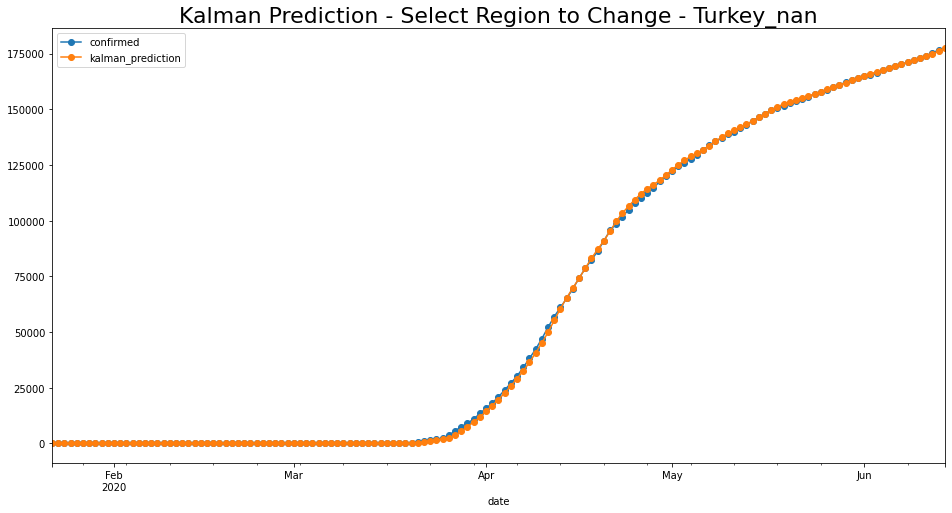

In [62]:
pconf.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(pconf.iloc[0,0]),fontdict={'fontsize': 22})
print(evaluationconf[evaluationconf['region']==pconf.iloc[0,0]])

In [0]:
evaluationdeath=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0

In [0]:
for i in range(1,len(tdeath)):
  if(tdeath.iloc[i,1] is not tdeath.iloc[i-1,1]):
    exdeath=np.array(tdeath.iloc[i-len(ts):i,10])
    #print(exdeath)
    preddeath=np.array(tdeath.iloc[i-len(ts):i,2])
    #print(preddeath)
    evaluationdeath=evaluationdeath.append({'region': tdeath.iloc[i-1,1], 'mse': np.power((exdeath - preddeath),2).mean(),'rmse':sqrt(mean_squared_error(exdeath,preddeath)),'mae': (abs(exdeath - preddeath)).mean()}, ignore_index=True)
    #print(evaluationdeath)

In [65]:
pdeath=tdeath[tdeath['region']==region][['date','region','death','kalman_prediction']]
pdeath.tail(10)

,date,region,death,kalman_prediction
715,2020-06-05,Turkey_nan,4648,4657.0
716,2020-06-06,Turkey_nan,4669,4675.0
717,2020-06-07,Turkey_nan,4692,4694.0
718,2020-06-08,Turkey_nan,4711,4714.0
719,2020-06-09,Turkey_nan,4729,4733.0
720,2020-06-10,Turkey_nan,4746,4751.0
721,2020-06-11,Turkey_nan,4763,4768.0
722,2020-06-12,Turkey_nan,4778,4784.0
723,2020-06-13,Turkey_nan,4792,4799.0
724,2020-06-14,Turkey_nan,0,4812.0


In [66]:
pdeath.iloc[len(pdeath)-1,2]=None
pdeath=pdeath.set_index(['date'])
pdeath.tail(10)

,region,death,kalman_prediction
date,,,
2020-06-05,Turkey_nan,4648.0,4657.0
2020-06-06,Turkey_nan,4669.0,4675.0
2020-06-07,Turkey_nan,4692.0,4694.0
2020-06-08,Turkey_nan,4711.0,4714.0
2020-06-09,Turkey_nan,4729.0,4733.0
2020-06-10,Turkey_nan,4746.0,4751.0
2020-06-11,Turkey_nan,4763.0,4768.0
2020-06-12,Turkey_nan,4778.0,4784.0
2020-06-13,Turkey_nan,4792.0,4799.0


In [67]:
pred_dif_death = (pdeath["death"] - pdeath["kalman_prediction"]).abs()
pred_dif_death.tail(30)

date
2020-05-16    12.0
2020-05-17    13.0
2020-05-18    25.0
2020-05-19    30.0
2020-05-20    34.0
2020-05-21    27.0
2020-05-22    19.0
2020-05-23     7.0
2020-05-24     0.0
2020-05-25     1.0
2020-05-26     0.0
2020-05-27     6.0
2020-05-28     4.0
2020-05-29     0.0
2020-05-30     4.0
2020-05-31     6.0
2020-06-01     9.0
2020-06-02    10.0
2020-06-03     7.0
2020-06-04     7.0
2020-06-05     9.0
2020-06-06     6.0
2020-06-07     2.0
2020-06-08     3.0
2020-06-09     4.0
2020-06-10     5.0
2020-06-11     5.0
2020-06-12     6.0
2020-06-13     7.0
2020-06-14     NaN
dtype: float64

       region            mse        rmse        mae
4  Turkey_nan  161146.604167  401.430697  44.659722


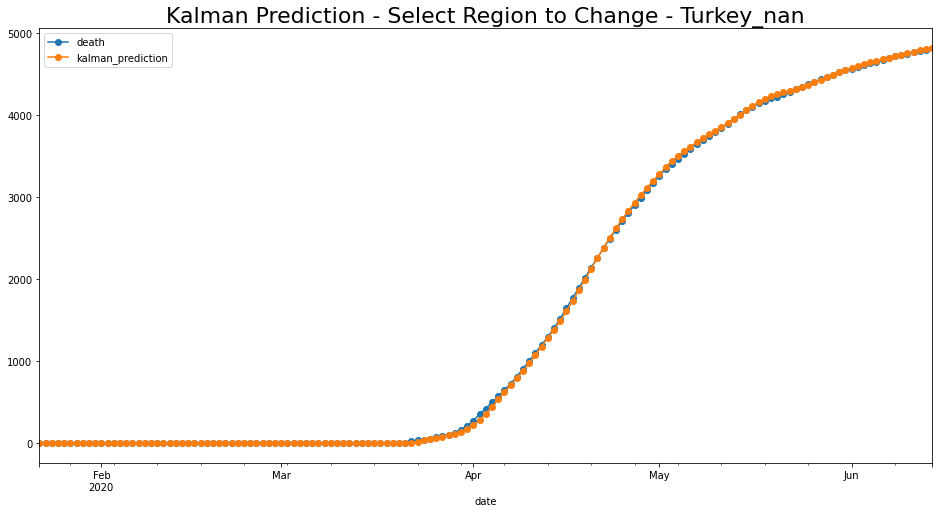

In [68]:
pdeath.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(pdeath.iloc[0,0]),fontdict={'fontsize': 22})
print(evaluationdeath[evaluationdeath['region']==pdeath.iloc[0,0]])

In [0]:
evaluationrec=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0

In [0]:
for i in range(1,len(trec)):
  if(trec.iloc[i,1] is not trec.iloc[i-1,1]):
    exrec=np.array(trec.iloc[i-len(ts):i,10])
    #print(exrec)
    predrec=np.array(trec.iloc[i-len(ts):i,2])
    #print(predrec)
    evaluationrec=evaluationrec.append({'region': trec.iloc[i-1,1], 'mse': np.power((exrec - predrec),2).mean(),'rmse':sqrt(mean_squared_error(exrec,predrec)),'mae': (abs(exrec - predrec)).mean()}, ignore_index=True)
    #print(evaluationrec)

In [71]:
prec=trec[trec['region']==region][['date','region','recover','kalman_prediction']]
prec.tail(10)

,date,region,recover,kalman_prediction
715,2020-06-05,Turkey_nan,133400,133009.0
716,2020-06-06,Turkey_nan,135322,134260.0
717,2020-06-07,Turkey_nan,137969,135982.0
718,2020-06-08,Turkey_nan,141380,138432.0
719,2020-06-09,Turkey_nan,144598,141767.0
720,2020-06-10,Turkey_nan,146839,145465.0
721,2020-06-11,Turkey_nan,147860,148682.0
722,2020-06-12,Turkey_nan,149102,150747.0
723,2020-06-13,Turkey_nan,150087,152183.0
724,2020-06-14,Turkey_nan,0,153098.0


In [72]:
prec.iloc[len(prec)-1,2]=None
prec=prec.set_index(['date'])
prec.tail(10)

,region,recover,kalman_prediction
date,,,
2020-06-05,Turkey_nan,133400.0,133009.0
2020-06-06,Turkey_nan,135322.0,134260.0
2020-06-07,Turkey_nan,137969.0,135982.0
2020-06-08,Turkey_nan,141380.0,138432.0
2020-06-09,Turkey_nan,144598.0,141767.0
2020-06-10,Turkey_nan,146839.0,145465.0
2020-06-11,Turkey_nan,147860.0,148682.0
2020-06-12,Turkey_nan,149102.0,150747.0
2020-06-13,Turkey_nan,150087.0,152183.0


In [73]:
pred_dif_rec = (prec["recover"] - prec["kalman_prediction"]).abs()
pred_dif_rec.tail(30)

date
2020-05-16    1595.0
2020-05-17    1471.0
2020-05-18    1399.0
2020-05-19    1451.0
2020-05-20    1491.0
2020-05-21    1381.0
2020-05-22    1001.0
2020-05-23     282.0
2020-05-24     258.0
2020-05-25      22.0
2020-05-26     339.0
2020-05-27     250.0
2020-05-28     457.0
2020-05-29     517.0
2020-05-30     101.0
2020-05-31     445.0
2020-06-01     578.0
2020-06-02     563.0
2020-06-03     515.0
2020-06-04     418.0
2020-06-05     391.0
2020-06-06    1062.0
2020-06-07    1987.0
2020-06-08    2948.0
2020-06-09    2831.0
2020-06-10    1374.0
2020-06-11     822.0
2020-06-12    1645.0
2020-06-13    2096.0
2020-06-14       NaN
dtype: float64

       region           mse          rmse          mae
4  Turkey_nan  1.638203e+08  12799.230555  1614.729167


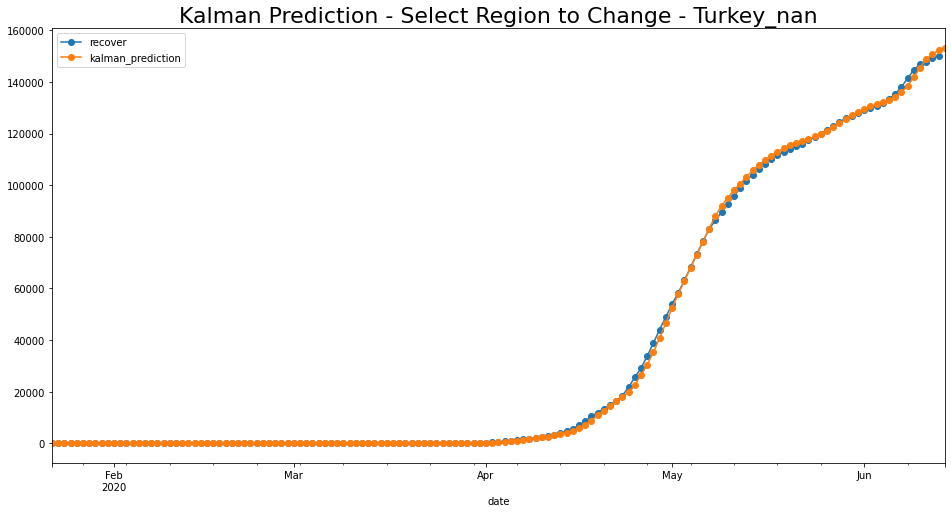

In [74]:
prec.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(prec.iloc[0,0]),fontdict={'fontsize': 22})
print(evaluationrec[evaluationrec['region']==prec.iloc[0,0]])

       region           mse          rmse          mae
0  Brazil_nan  5.392936e+09  73436.615372  8120.020833


,region,confirmed,kalman_prediction
date,,,
2020-06-05,Brazil_nan,645771.0,634381.0
2020-06-06,Brazil_nan,672846.0,666579.0
2020-06-07,Brazil_nan,691758.0,697296.0
2020-06-08,Brazil_nan,707412.0,721655.0
2020-06-09,Brazil_nan,739503.0,739827.0
2020-06-10,Brazil_nan,772416.0,764485.0
2020-06-11,Brazil_nan,802828.0,794188.0
2020-06-12,Brazil_nan,828810.0,825498.0
2020-06-13,Brazil_nan,850514.0,854795.0


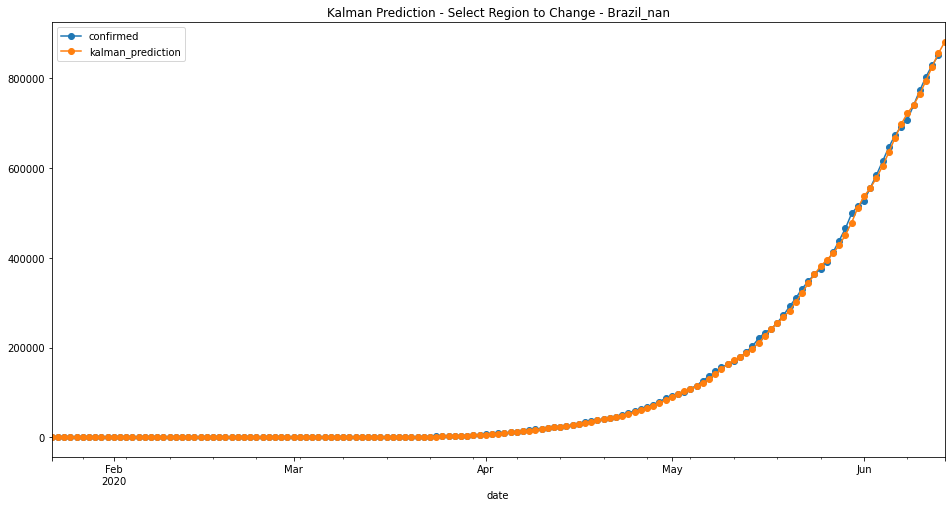

In [75]:
# Select region
region='Brazil_nan'

evaluationconf=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(tconf)):
  if(tconf.iloc[i,1] is not tconf.iloc[i-1,1]):
    exconf=np.array(tconf.iloc[i-len(ts):i,10])
    predconf=np.array(tconf.iloc[i-len(ts):i,2])
    evaluationconf=evaluationconf.append({'region': tconf.iloc[i-1,1], 'mse': np.power((exconf - predconf),2).mean(),'rmse':sqrt(mean_squared_error(exconf,predconf)),'mae': (abs(exconf - predconf)).mean()}, ignore_index=True)
pconf=tconf[tconf['region']==region][['date','region','confirmed','kalman_prediction']]
pconf.iloc[len(pconf)-1,2]=None
pconf=pconf.set_index(['date'])
pconf.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(pconf.iloc[0,0]))
print(evaluationconf[evaluationconf['region']==pconf.iloc[0,0]])
pconf.tail(10)

In [76]:
pred_dif_conf = (pconf["confirmed"] - pconf["kalman_prediction"]).abs()
pred_dif_conf.tail(30)

date
2020-05-16     7431.0
2020-05-17      842.0
2020-05-18     1612.0
2020-05-19     4905.0
2020-05-20     9106.0
2020-05-21     8805.0
2020-05-22     9642.0
2020-05-23     4369.0
2020-05-24      232.0
2020-05-25     6124.0
2020-05-26     3956.0
2020-05-27     2053.0
2020-05-28    10757.0
2020-05-29    14299.0
2020-05-30    20415.0
2020-05-31     3784.0
2020-06-01    10409.0
2020-06-02      933.0
2020-06-03     6511.0
2020-06-04    10802.0
2020-06-05    11390.0
2020-06-06     6267.0
2020-06-07     5538.0
2020-06-08    14243.0
2020-06-09      324.0
2020-06-10     7931.0
2020-06-11     8640.0
2020-06-12     3312.0
2020-06-13     4281.0
2020-06-14        NaN
dtype: float64

       region           mse         rmse         mae
0  Brazil_nan  1.337108e+07  3656.649255  409.118056


,region,death,kalman_prediction
date,,,
2020-06-05,Brazil_nan,35026.0,34679.0
2020-06-06,Brazil_nan,35930.0,35965.0
2020-06-07,Brazil_nan,36455.0,37067.0
2020-06-08,Brazil_nan,37134.0,37808.0
2020-06-09,Brazil_nan,38406.0,38420.0
2020-06-10,Brazil_nan,39680.0,39340.0
2020-06-11,Brazil_nan,40919.0,40476.0
2020-06-12,Brazil_nan,41828.0,41726.0
2020-06-13,Brazil_nan,42720.0,42831.0


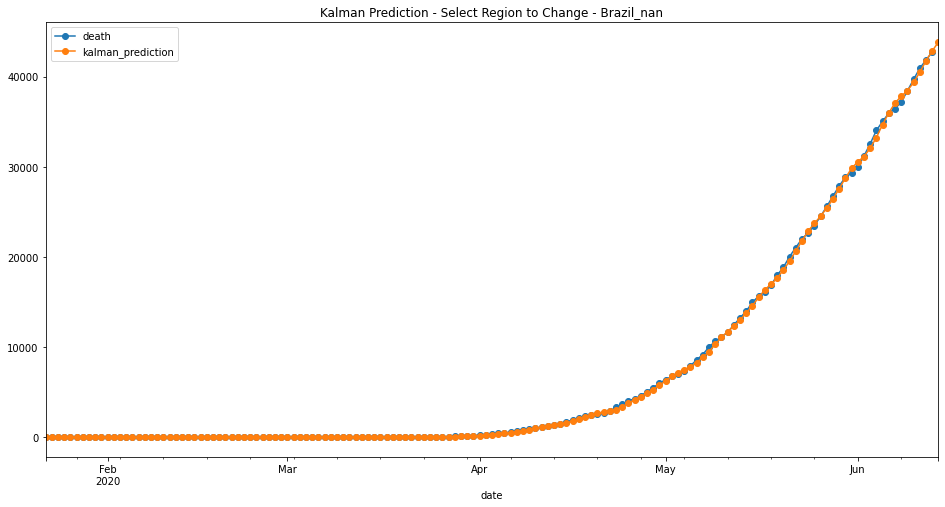

In [77]:
evaluationdeath=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(tdeath)):
  if(tdeath.iloc[i,1] is not tdeath.iloc[i-1,1]):
    exdeath=np.array(tdeath.iloc[i-len(ts):i,10])
    preddeath=np.array(tdeath.iloc[i-len(ts):i,2])
    evaluationdeath=evaluationdeath.append({'region': tdeath.iloc[i-1,1], 'mse': np.power((exdeath - preddeath),2).mean(),'rmse':sqrt(mean_squared_error(exdeath,preddeath)),'mae': (abs(exdeath - preddeath)).mean()}, ignore_index=True)
pdeath=tdeath[tdeath['region']==region][['date','region','death','kalman_prediction']]
pdeath.iloc[len(pdeath)-1,2]=None
pdeath=pdeath.set_index(['date'])
pdeath.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(pdeath.iloc[0,0]))
print(evaluationdeath[evaluationdeath['region']==pdeath.iloc[0,0]])
pdeath.tail(10)

In [78]:
pred_dif_death = (pdeath["death"] - pdeath["kalman_prediction"]).abs()
pred_dif_death.tail(30)

date
2020-05-16    145.0
2020-05-17    243.0
2020-05-18    134.0
2020-05-19    338.0
2020-05-20    285.0
2020-05-21    527.0
2020-05-22    390.0
2020-05-23    224.0
2020-05-24    209.0
2020-05-25    254.0
2020-05-26      8.0
2020-05-27    170.0
2020-05-28    310.0
2020-05-29    306.0
2020-05-30     91.0
2020-05-31    512.0
2020-06-01    614.0
2020-06-02     62.0
2020-06-03    498.0
2020-06-04    780.0
2020-06-05    347.0
2020-06-06     35.0
2020-06-07    612.0
2020-06-08    674.0
2020-06-09     14.0
2020-06-10    340.0
2020-06-11    443.0
2020-06-12    102.0
2020-06-13    111.0
2020-06-14      NaN
dtype: float64

       region           mse          rmse          mae
0  Brazil_nan  1.759071e+09  41941.280493  5726.263889


,region,recover,kalman_prediction
date,,,
2020-06-05,Brazil_nan,266940.0,260766.0
2020-06-06,Brazil_nan,277149.0,275875.0
2020-06-07,Brazil_nan,283952.0,288871.0
2020-06-08,Brazil_nan,378257.0,298235.0
2020-06-09,Brazil_nan,396737.0,359274.0
2020-06-10,Brazil_nan,413916.0,405862.0
2020-06-11,Brazil_nan,429965.0,439833.0
2020-06-12,Brazil_nan,445123.0,463936.0
2020-06-13,Brazil_nan,459436.0,481065.0


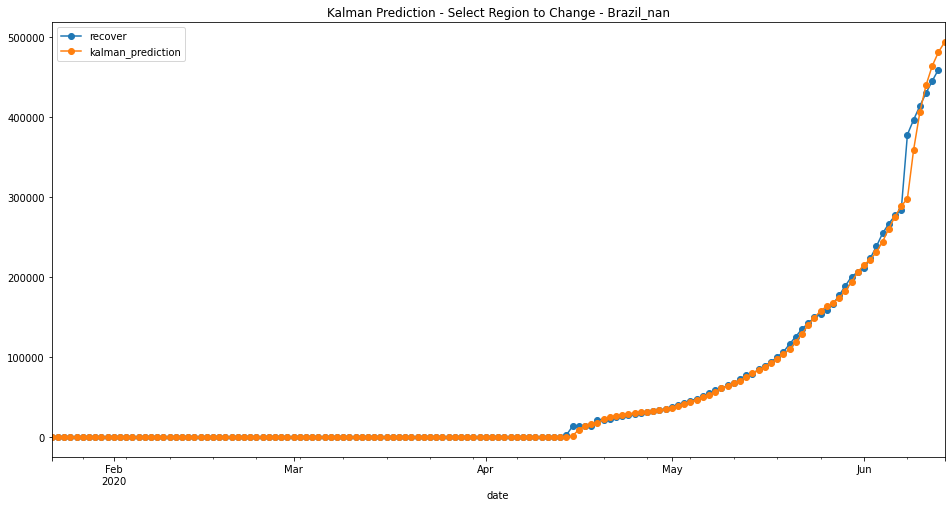

In [79]:
evaluationrec=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(trec)):
  if(trec.iloc[i,1] is not trec.iloc[i-1,1]):
    exrec=np.array(trec.iloc[i-len(ts):i,10])
    predrec=np.array(trec.iloc[i-len(ts):i,2])
    evaluationrec=evaluationrec.append({'region': trec.iloc[i-1,1], 'mse': np.power((exrec - predrec),2).mean(),'rmse':sqrt(mean_squared_error(exrec,predrec)),'mae': (abs(exrec - predrec)).mean()}, ignore_index=True)
prec=trec[trec['region']==region][['date','region','recover','kalman_prediction']]
prec.iloc[len(prec)-1,2]=None
prec=prec.set_index(['date'])
prec.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(prec.iloc[0,0]))
print(evaluationrec[evaluationrec['region']==prec.iloc[0,0]])
prec.tail(10)

In [80]:
pred_dif_rec = (prec["recover"] - prec["kalman_prediction"]).abs()
pred_dif_rec.tail(30)

date
2020-05-16     1413.0
2020-05-17     1081.0
2020-05-18     2633.0
2020-05-19     3066.0
2020-05-20     6397.0
2020-05-21     6610.0
2020-05-22     5940.0
2020-05-23     2396.0
2020-05-24      329.0
2020-05-25     4219.0
2020-05-26     5171.0
2020-05-27     1620.0
2020-05-28     3407.0
2020-05-29     6486.0
2020-05-30     6707.0
2020-05-31       82.0
2020-06-01     4583.0
2020-06-02     1651.0
2020-06-03     7136.0
2020-06-04    10360.0
2020-06-05     6174.0
2020-06-06     1274.0
2020-06-07     4919.0
2020-06-08    80022.0
2020-06-09    37463.0
2020-06-10     8054.0
2020-06-11     9868.0
2020-06-12    18813.0
2020-06-13    21629.0
2020-06-14        NaN
dtype: float64

        region           mse          rmse          mae
1  Germany_nan  2.458062e+08  15678.209352  1925.854167


,region,confirmed,kalman_prediction
date,,,
2020-06-05,Germany_nan,184924.0,184805.0
2020-06-06,Germany_nan,185450.0,185164.0
2020-06-07,Germany_nan,185750.0,185644.0
2020-06-08,Germany_nan,186109.0,186055.0
2020-06-09,Germany_nan,186506.0,186449.0
2020-06-10,Germany_nan,186522.0,186853.0
2020-06-11,Germany_nan,186691.0,187026.0
2020-06-12,Germany_nan,187226.0,187148.0
2020-06-13,Germany_nan,187267.0,187475.0


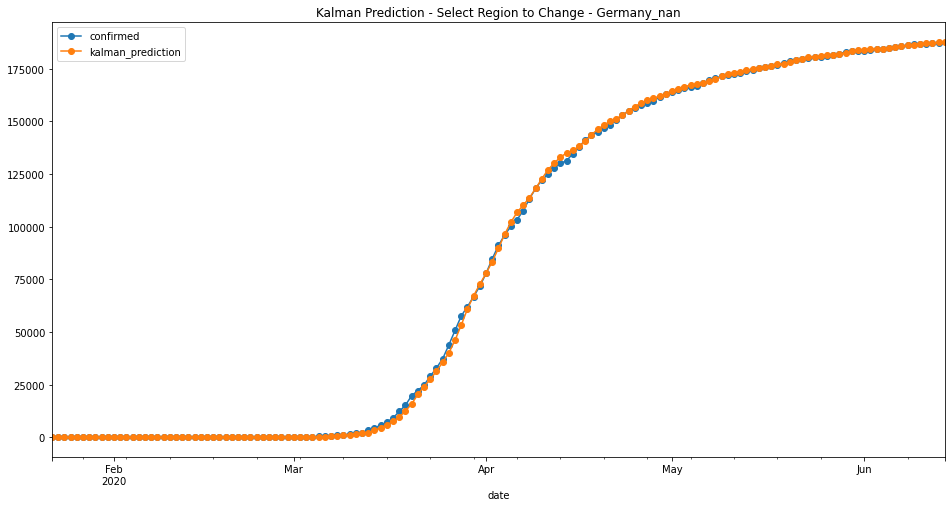

In [81]:
# Select region
region='Germany_nan'

evaluationconf=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(tconf)):
  if(tconf.iloc[i,1] is not tconf.iloc[i-1,1]):
    exconf=np.array(tconf.iloc[i-len(ts):i,10])
    predconf=np.array(tconf.iloc[i-len(ts):i,2])
    evaluationconf=evaluationconf.append({'region': tconf.iloc[i-1,1], 'mse': np.power((exconf - predconf),2).mean(),'rmse':sqrt(mean_squared_error(exconf,predconf)),'mae': (abs(exconf - predconf)).mean()}, ignore_index=True)
pconf=tconf[tconf['region']==region][['date','region','confirmed','kalman_prediction']]
pconf.iloc[len(pconf)-1,2]=None
pconf=pconf.set_index(['date'])
pconf.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(pconf.iloc[0,0]))
print(evaluationconf[evaluationconf['region']==pconf.iloc[0,0]])
pconf.tail(10)

In [82]:
pred_dif_conf = (pconf["confirmed"] - pconf["kalman_prediction"]).abs()
pred_dif_conf.tail(30)

date
2020-05-16    245.0
2020-05-17    148.0
2020-05-18    510.0
2020-05-19    418.0
2020-05-20    317.0
2020-05-21     70.0
2020-05-22     69.0
2020-05-23    354.0
2020-05-24    461.0
2020-05-25    519.0
2020-05-26    146.0
2020-05-27    202.0
2020-05-28    146.0
2020-05-29    363.0
2020-05-30     34.0
2020-05-31    286.0
2020-06-01    415.0
2020-06-02    320.0
2020-06-03    266.0
2020-06-04     89.0
2020-06-05    119.0
2020-06-06    286.0
2020-06-07    106.0
2020-06-08     54.0
2020-06-09     57.0
2020-06-10    331.0
2020-06-11    335.0
2020-06-12     78.0
2020-06-13    208.0
2020-06-14      NaN
dtype: float64

        region            mse        rmse        mae
1  Germany_nan  544261.034722  737.740493  98.673611


,region,death,kalman_prediction
date,,,
2020-06-05,Germany_nan,8658.0,8653.0
2020-06-06,Germany_nan,8673.0,8679.0
2020-06-07,Germany_nan,8685.0,8699.0
2020-06-08,Germany_nan,8695.0,8713.0
2020-06-09,Germany_nan,8736.0,8722.0
2020-06-10,Germany_nan,8752.0,8749.0
2020-06-11,Germany_nan,8772.0,8771.0
2020-06-12,Germany_nan,8783.0,8792.0
2020-06-13,Germany_nan,8793.0,8807.0


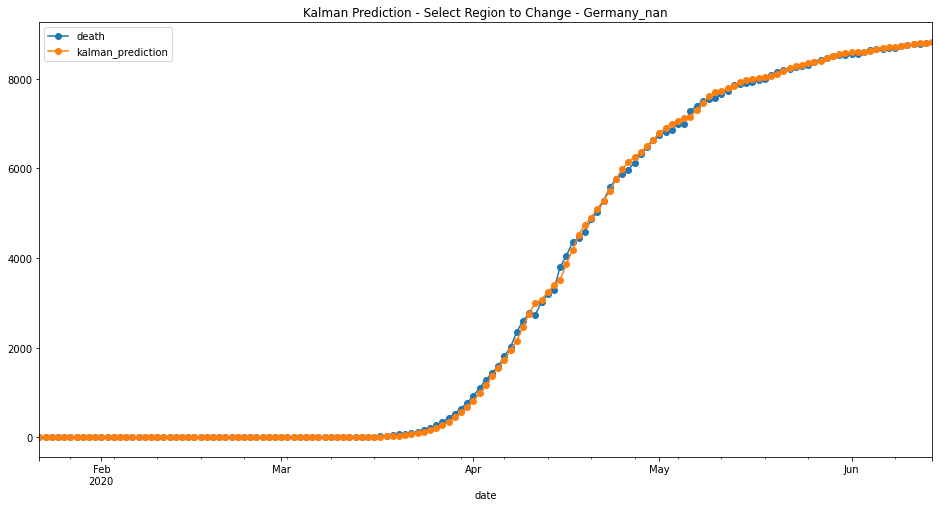

In [83]:
evaluationdeath=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(tdeath)):
  if(tdeath.iloc[i,1] is not tdeath.iloc[i-1,1]):
    exdeath=np.array(tdeath.iloc[i-len(ts):i,10])
    preddeath=np.array(tdeath.iloc[i-len(ts):i,2])
    evaluationdeath=evaluationdeath.append({'region': tdeath.iloc[i-1,1], 'mse': np.power((exdeath - preddeath),2).mean(),'rmse':sqrt(mean_squared_error(exdeath,preddeath)),'mae': (abs(exdeath - preddeath)).mean()}, ignore_index=True)
pdeath=tdeath[tdeath['region']==region][['date','region','death','kalman_prediction']]
pdeath.iloc[len(pdeath)-1,2]=None
pdeath=pdeath.set_index(['date'])
pdeath.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(pdeath.iloc[0,0]))
print(evaluationdeath[evaluationdeath['region']==pdeath.iloc[0,0]])
pdeath.tail(10)

In [84]:
pred_dif_death = (pdeath["death"] - pdeath["kalman_prediction"]).abs()
pred_dif_death.tail(30)

date
2020-05-16    66.0
2020-05-17    63.0
2020-05-18    35.0
2020-05-19    22.0
2020-05-20    34.0
2020-05-21    31.0
2020-05-22     9.0
2020-05-23    21.0
2020-05-24    35.0
2020-05-25    33.0
2020-05-26     9.0
2020-05-27    24.0
2020-05-28    14.0
2020-05-29     2.0
2020-05-30    17.0
2020-05-31    39.0
2020-06-01    40.0
2020-06-02    42.0
2020-06-03     5.0
2020-06-04     9.0
2020-06-05     5.0
2020-06-06     6.0
2020-06-07    14.0
2020-06-08    18.0
2020-06-09    14.0
2020-06-10     3.0
2020-06-11     1.0
2020-06-12     9.0
2020-06-13    14.0
2020-06-14     NaN
dtype: float64

        region           mse          rmse        mae
1  Germany_nan  2.084339e+08  14437.240602  1864.3125


,region,recover,kalman_prediction
date,,,
2020-06-05,Germany_nan,168480.0,168574.0
2020-06-06,Germany_nan,168958.0,169157.0
2020-06-07,Germany_nan,169224.0,169662.0
2020-06-08,Germany_nan,169556.0,169989.0
2020-06-09,Germany_nan,170129.0,170255.0
2020-06-10,Germany_nan,170630.0,170647.0
2020-06-11,Germany_nan,170961.0,171087.0
2020-06-12,Germany_nan,171535.0,171458.0
2020-06-13,Germany_nan,171970.0,171935.0


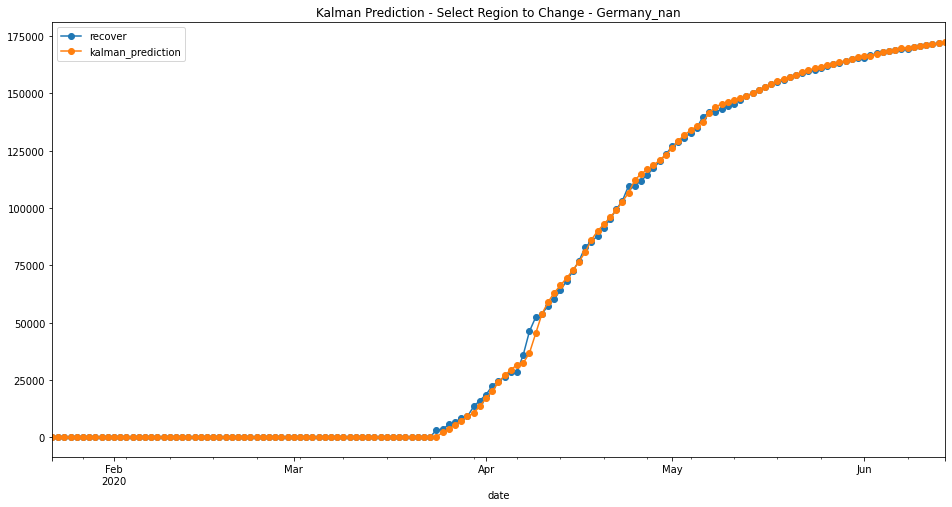

In [85]:
evaluationrec=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(trec)):
  if(trec.iloc[i,1] is not trec.iloc[i-1,1]):
    exrec=np.array(trec.iloc[i-len(ts):i,10])
    predrec=np.array(trec.iloc[i-len(ts):i,2])
    evaluationrec=evaluationrec.append({'region': trec.iloc[i-1,1], 'mse': np.power((exrec - predrec),2).mean(),'rmse':sqrt(mean_squared_error(exrec,predrec)),'mae': (abs(exrec - predrec)).mean()}, ignore_index=True)
prec=trec[trec['region']==region][['date','region','recover','kalman_prediction']]
prec.iloc[len(prec)-1,2]=None
prec=prec.set_index(['date'])
prec.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(prec.iloc[0,0]))
print(evaluationrec[evaluationrec['region']==prec.iloc[0,0]])
prec.tail(10)

In [86]:
pred_dif_rec = (prec["recover"] - prec["kalman_prediction"]).abs()
pred_dif_rec.tail(30)

date
2020-05-16    351.0
2020-05-17     81.0
2020-05-18    307.0
2020-05-19    772.0
2020-05-20    259.0
2020-05-21    113.0
2020-05-22    163.0
2020-05-23    490.0
2020-05-24    679.0
2020-05-25    326.0
2020-05-26    240.0
2020-05-27     74.0
2020-05-28    288.0
2020-05-29     15.0
2020-05-30     89.0
2020-05-31    334.0
2020-06-01    579.0
2020-06-02     73.0
2020-06-03    276.0
2020-06-04     46.0
2020-06-05     94.0
2020-06-06    199.0
2020-06-07    438.0
2020-06-08    433.0
2020-06-09    126.0
2020-06-10     17.0
2020-06-11    126.0
2020-06-12     77.0
2020-06-13     35.0
2020-06-14      NaN
dtype: float64

      region           mse          rmse          mae
3  Italy_nan  3.905809e+08  19763.120895  2202.715278


,region,confirmed,kalman_prediction
date,,,
2020-06-05,Italy_nan,234531.0,234453.0
2020-06-06,Italy_nan,234801.0,234800.0
2020-06-07,Italy_nan,234998.0,235111.0
2020-06-08,Italy_nan,235278.0,235352.0
2020-06-09,Italy_nan,235561.0,235600.0
2020-06-10,Italy_nan,235763.0,235859.0
2020-06-11,Italy_nan,236142.0,236077.0
2020-06-12,Italy_nan,236305.0,236380.0
2020-06-13,Italy_nan,236651.0,236606.0


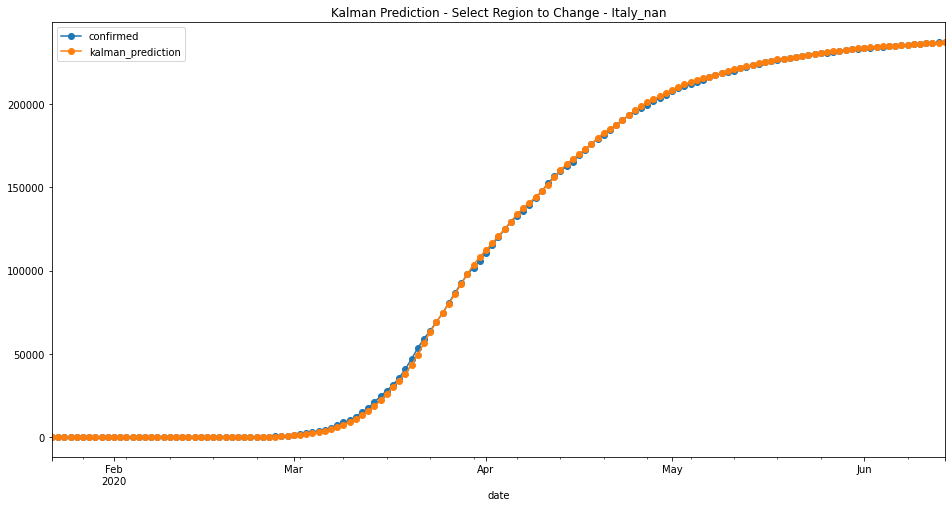

In [87]:
# Select region
region='Italy_nan'

evaluationconf=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(tconf)):
  if(tconf.iloc[i,1] is not tconf.iloc[i-1,1]):
    exconf=np.array(tconf.iloc[i-len(ts):i,10])
    predconf=np.array(tconf.iloc[i-len(ts):i,2])
    evaluationconf=evaluationconf.append({'region': tconf.iloc[i-1,1], 'mse': np.power((exconf - predconf),2).mean(),'rmse':sqrt(mean_squared_error(exconf,predconf)),'mae': (abs(exconf - predconf)).mean()}, ignore_index=True)
pconf=tconf[tconf['region']==region][['date','region','confirmed','kalman_prediction']]
pconf.iloc[len(pconf)-1,2]=None
pconf=pconf.set_index(['date'])
pconf.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(pconf.iloc[0,0]))
print(evaluationconf[evaluationconf['region']==pconf.iloc[0,0]])
pconf.tail(10)

In [88]:
pred_dif_conf = (pconf["confirmed"] - pconf["kalman_prediction"]).abs()
pred_dif_conf.tail(30)

date
2020-05-16    231.0
2020-05-17    372.0
2020-05-18    615.0
2020-05-19    292.0
2020-05-20    225.0
2020-05-21    179.0
2020-05-22    119.0
2020-05-23     52.0
2020-05-24    147.0
2020-05-25    407.0
2020-05-26    387.0
2020-05-27    133.0
2020-05-28     30.0
2020-05-29     36.0
2020-05-30     67.0
2020-05-31    194.0
2020-06-01    366.0
2020-06-02    285.0
2020-06-03    198.0
2020-06-04    266.0
2020-06-05     78.0
2020-06-06      1.0
2020-06-07    113.0
2020-06-08     74.0
2020-06-09     39.0
2020-06-10     96.0
2020-06-11     65.0
2020-06-12     75.0
2020-06-13     45.0
2020-06-14      NaN
dtype: float64

      region           mse       rmse       mae
3  Italy_nan  8.216771e+06  2866.4911  317.9375


,region,death,kalman_prediction
date,,,
2020-06-05,Italy_nan,33774.0,33761.0
2020-06-06,Italy_nan,33846.0,33841.0
2020-06-07,Italy_nan,33899.0,33918.0
2020-06-08,Italy_nan,33964.0,33981.0
2020-06-09,Italy_nan,34043.0,34043.0
2020-06-10,Italy_nan,34114.0,34112.0
2020-06-11,Italy_nan,34167.0,34183.0
2020-06-12,Italy_nan,34223.0,34243.0
2020-06-13,Italy_nan,34301.0,34298.0


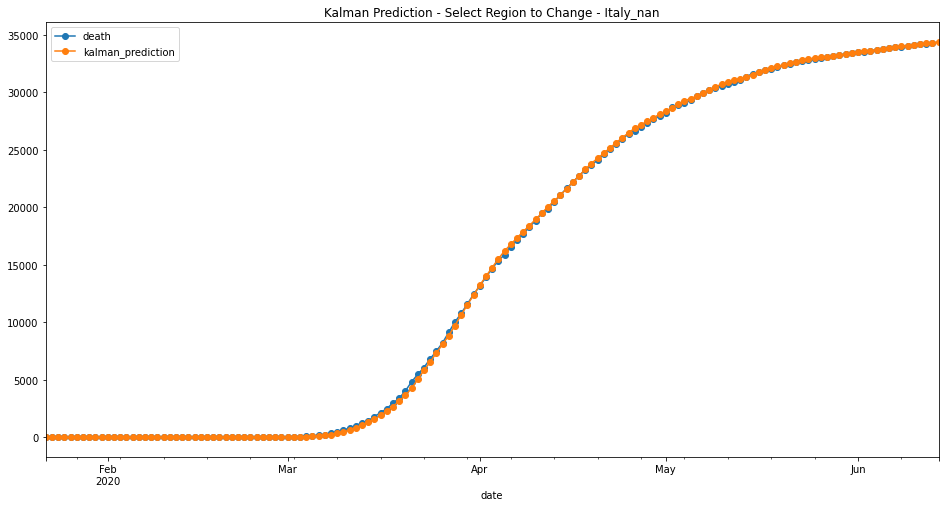

In [89]:
evaluationdeath=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(tdeath)):
  if(tdeath.iloc[i,1] is not tdeath.iloc[i-1,1]):
    exdeath=np.array(tdeath.iloc[i-len(ts):i,10])
    preddeath=np.array(tdeath.iloc[i-len(ts):i,2])
    evaluationdeath=evaluationdeath.append({'region': tdeath.iloc[i-1,1], 'mse': np.power((exdeath - preddeath),2).mean(),'rmse':sqrt(mean_squared_error(exdeath,preddeath)),'mae': (abs(exdeath - preddeath)).mean()}, ignore_index=True)
pdeath=tdeath[tdeath['region']==region][['date','region','death','kalman_prediction']]
pdeath.iloc[len(pdeath)-1,2]=None
pdeath=pdeath.set_index(['date'])
pdeath.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(pdeath.iloc[0,0]))
print(evaluationdeath[evaluationdeath['region']==pdeath.iloc[0,0]])
pdeath.tail(10)

In [90]:
pred_dif_death = (pdeath["death"] - pdeath["kalman_prediction"]).abs()
pred_dif_death.tail(30)

date
2020-05-16     18.0
2020-05-17     68.0
2020-05-18    130.0
2020-05-19     81.0
2020-05-20     44.0
2020-05-21     23.0
2020-05-22     34.0
2020-05-23     46.0
2020-05-24    115.0
2020-05-25     92.0
2020-05-26     81.0
2020-05-27     24.0
2020-05-28     37.0
2020-05-29     21.0
2020-05-30     14.0
2020-05-31      5.0
2020-06-01     30.0
2020-06-02     43.0
2020-06-03     28.0
2020-06-04      1.0
2020-06-05     13.0
2020-06-06      5.0
2020-06-07     19.0
2020-06-08     17.0
2020-06-09      0.0
2020-06-10      2.0
2020-06-11     16.0
2020-06-12     20.0
2020-06-13      3.0
2020-06-14      NaN
dtype: float64

      region           mse          rmse          mae
3  Italy_nan  2.158359e+08  14691.353167  1781.590278


,region,recover,kalman_prediction
date,,,
2020-06-05,Italy_nan,163781.0,164337.0
2020-06-06,Italy_nan,165078.0,165466.0
2020-06-07,Italy_nan,165837.0,166617.0
2020-06-08,Italy_nan,166584.0,167469.0
2020-06-09,Italy_nan,168646.0,168141.0
2020-06-10,Italy_nan,169939.0,169540.0
2020-06-11,Italy_nan,171338.0,170948.0
2020-06-12,Italy_nan,173085.0,172409.0
2020-06-13,Italy_nan,174865.0,174105.0


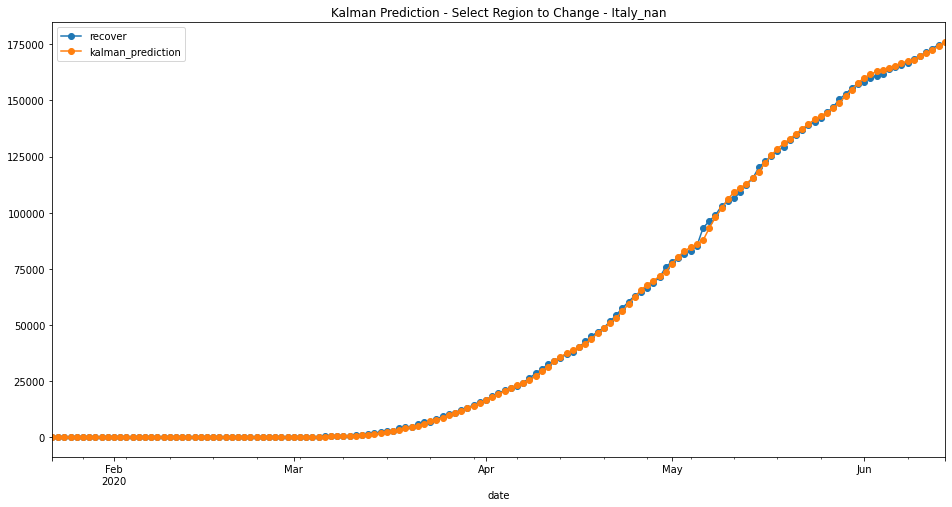

In [91]:
evaluationrec=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(trec)):
  if(trec.iloc[i,1] is not trec.iloc[i-1,1]):
    exrec=np.array(trec.iloc[i-len(ts):i,10])
    predrec=np.array(trec.iloc[i-len(ts):i,2])
    evaluationrec=evaluationrec.append({'region': trec.iloc[i-1,1], 'mse': np.power((exrec - predrec),2).mean(),'rmse':sqrt(mean_squared_error(exrec,predrec)),'mae': (abs(exrec - predrec)).mean()}, ignore_index=True)
prec=trec[trec['region']==region][['date','region','recover','kalman_prediction']]
prec.iloc[len(prec)-1,2]=None
prec=prec.set_index(['date'])
prec.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(prec.iloc[0,0]))
print(evaluationrec[evaluationrec['region']==prec.iloc[0,0]])
prec.tail(10)

In [92]:
pred_dif_rec = (prec["recover"] - prec["kalman_prediction"]).abs()
pred_dif_rec.tail(30)

date
2020-05-16     666.0
2020-05-17     413.0
2020-05-18    1140.0
2020-05-19    1433.0
2020-05-20     571.0
2020-05-21     632.0
2020-05-22     690.0
2020-05-23     658.0
2020-05-24    1026.0
2020-05-25    1206.0
2020-05-26      51.0
2020-05-27     476.0
2020-05-28    1692.0
2020-05-29     824.0
2020-05-30     791.0
2020-05-31     258.0
2020-06-01    1803.0
2020-06-02    1467.0
2020-06-03    1964.0
2020-06-04    1827.0
2020-06-05     556.0
2020-06-06     388.0
2020-06-07     780.0
2020-06-08     885.0
2020-06-09     505.0
2020-06-10     399.0
2020-06-11     390.0
2020-06-12     676.0
2020-06-13     760.0
2020-06-14       NaN
dtype: float64

     region           mse          rmse          mae
2  Iran_nan  2.434500e+08  15602.882915  1714.458333


,region,confirmed,kalman_prediction
date,,,
2020-06-05,Iran_nan,167156.0,166552.0
2020-06-06,Iran_nan,169425.0,169926.0
2020-06-07,Iran_nan,171789.0,172707.0
2020-06-08,Iran_nan,173832.0,175157.0
2020-06-09,Iran_nan,175927.0,177221.0
2020-06-10,Iran_nan,177938.0,179108.0
2020-06-11,Iran_nan,180156.0,180881.0
2020-06-12,Iran_nan,182525.0,182756.0
2020-06-13,Iran_nan,184955.0,184829.0


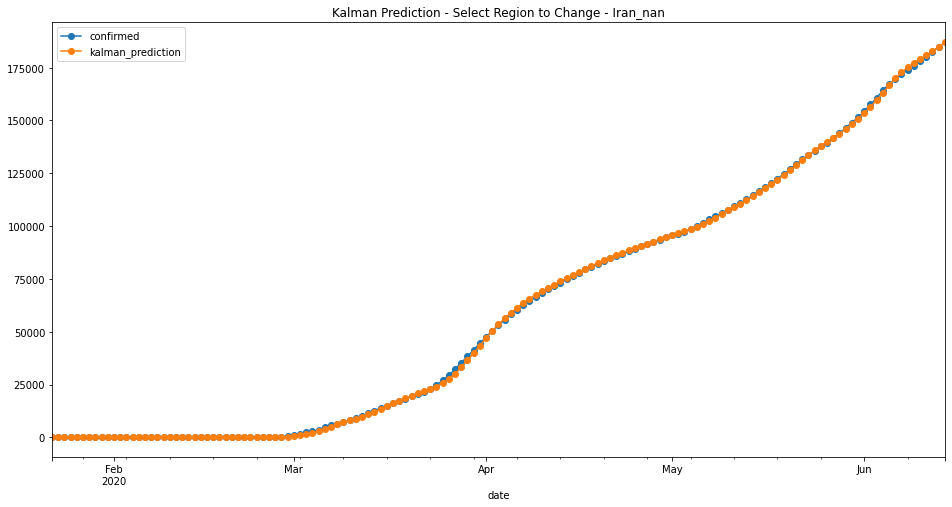

In [93]:
# Select region
region='Iran_nan'

evaluationconf=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(tconf)):
  if(tconf.iloc[i,1] is not tconf.iloc[i-1,1]):
    exconf=np.array(tconf.iloc[i-len(ts):i,10])
    predconf=np.array(tconf.iloc[i-len(ts):i,2])
    evaluationconf=evaluationconf.append({'region': tconf.iloc[i-1,1], 'mse': np.power((exconf - predconf),2).mean(),'rmse':sqrt(mean_squared_error(exconf,predconf)),'mae': (abs(exconf - predconf)).mean()}, ignore_index=True)
pconf=tconf[tconf['region']==region][['date','region','confirmed','kalman_prediction']]
pconf.iloc[len(pconf)-1,2]=None
pconf=pconf.set_index(['date'])
pconf.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(pconf.iloc[0,0]))
print(evaluationconf[evaluationconf['region']==pconf.iloc[0,0]])
pconf.tail(10)

In [94]:
pred_dif_conf = (pconf["confirmed"] - pconf["kalman_prediction"]).abs()
pred_dif_conf.tail(30)

date
2020-05-16     327.0
2020-05-17     154.0
2020-05-18     528.0
2020-05-19     465.0
2020-05-20     598.0
2020-05-21     627.0
2020-05-22     468.0
2020-05-23     127.0
2020-05-24     113.0
2020-05-25     246.0
2020-05-26     516.0
2020-05-27     290.0
2020-05-28      50.0
2020-05-29     785.0
2020-05-30     521.0
2020-05-31     539.0
2020-06-01     932.0
2020-06-02    1141.0
2020-06-03    1100.0
2020-06-04    1357.0
2020-06-05     604.0
2020-06-06     501.0
2020-06-07     918.0
2020-06-08    1325.0
2020-06-09    1294.0
2020-06-10    1170.0
2020-06-11     725.0
2020-06-12     231.0
2020-06-13     126.0
2020-06-14       NaN
dtype: float64

     region            mse        rmse        mae
2  Iran_nan  539112.965278  734.243124  76.520833


,region,death,kalman_prediction
date,,,
2020-06-05,Iran_nan,8134.0,8136.0
2020-06-06,Iran_nan,8209.0,8201.0
2020-06-07,Iran_nan,8281.0,8272.0
2020-06-08,Iran_nan,8351.0,8345.0
2020-06-09,Iran_nan,8425.0,8417.0
2020-06-10,Iran_nan,8506.0,8491.0
2020-06-11,Iran_nan,8584.0,8571.0
2020-06-12,Iran_nan,8659.0,8652.0
2020-06-13,Iran_nan,8730.0,8731.0


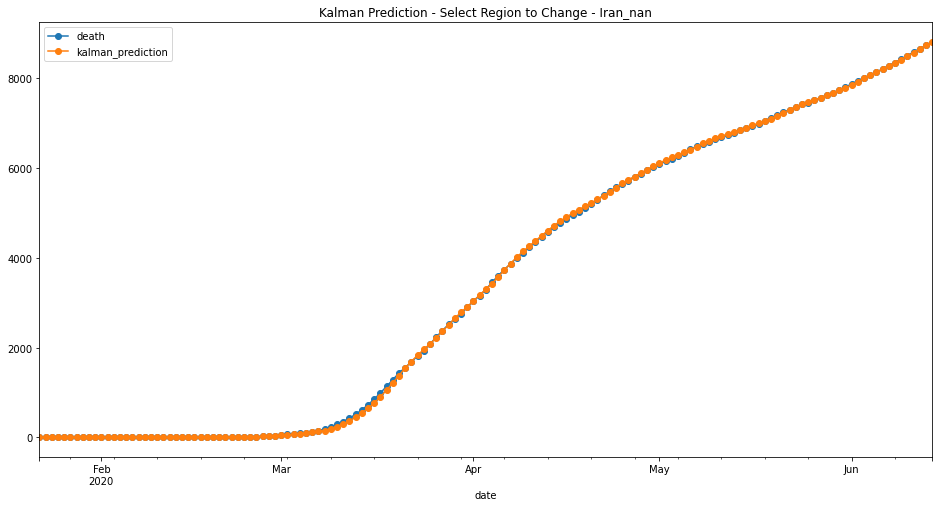

In [95]:
evaluationdeath=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(tdeath)):
  if(tdeath.iloc[i,1] is not tdeath.iloc[i-1,1]):
    exdeath=np.array(tdeath.iloc[i-len(ts):i,10])
    preddeath=np.array(tdeath.iloc[i-len(ts):i,2])
    evaluationdeath=evaluationdeath.append({'region': tdeath.iloc[i-1,1], 'mse': np.power((exdeath - preddeath),2).mean(),'rmse':sqrt(mean_squared_error(exdeath,preddeath)),'mae': (abs(exdeath - preddeath)).mean()}, ignore_index=True)
pdeath=tdeath[tdeath['region']==region][['date','region','death','kalman_prediction']]
pdeath.iloc[len(pdeath)-1,2]=None
pdeath=pdeath.set_index(['date'])
pdeath.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(pdeath.iloc[0,0]))
print(evaluationdeath[evaluationdeath['region']==pdeath.iloc[0,0]])
pdeath.tail(10)

In [96]:
pred_dif_death = (pdeath["death"] - pdeath["kalman_prediction"]).abs()
pred_dif_death.tail(30)

date
2020-05-16    16.0
2020-05-17     8.0
2020-05-18    16.0
2020-05-19    19.0
2020-05-20    20.0
2020-05-21    19.0
2020-05-22     1.0
2020-05-23     1.0
2020-05-24     2.0
2020-05-25    27.0
2020-05-26    13.0
2020-05-27     5.0
2020-05-28     7.0
2020-05-29     0.0
2020-05-30     3.0
2020-05-31    10.0
2020-06-01    30.0
2020-06-02    20.0
2020-06-03    17.0
2020-06-04     2.0
2020-06-05     2.0
2020-06-06     8.0
2020-06-07     9.0
2020-06-08     6.0
2020-06-09     8.0
2020-06-10    15.0
2020-06-11    13.0
2020-06-12     7.0
2020-06-13     1.0
2020-06-14     NaN
dtype: float64

     region           mse          rmse          mae
2  Iran_nan  1.545767e+08  12432.889046  1430.604167


,region,recover,kalman_prediction
date,,,
2020-06-05,Iran_nan,129741.0,129374.0
2020-06-06,Iran_nan,132038.0,131703.0
2020-06-07,Iran_nan,134349.0,134066.0
2020-06-08,Iran_nan,136360.0,136447.0
2020-06-09,Iran_nan,138457.0,138641.0
2020-06-10,Iran_nan,140590.0,140762.0
2020-06-11,Iran_nan,142663.0,142864.0
2020-06-12,Iran_nan,144649.0,144922.0
2020-06-13,Iran_nan,146748.0,146906.0


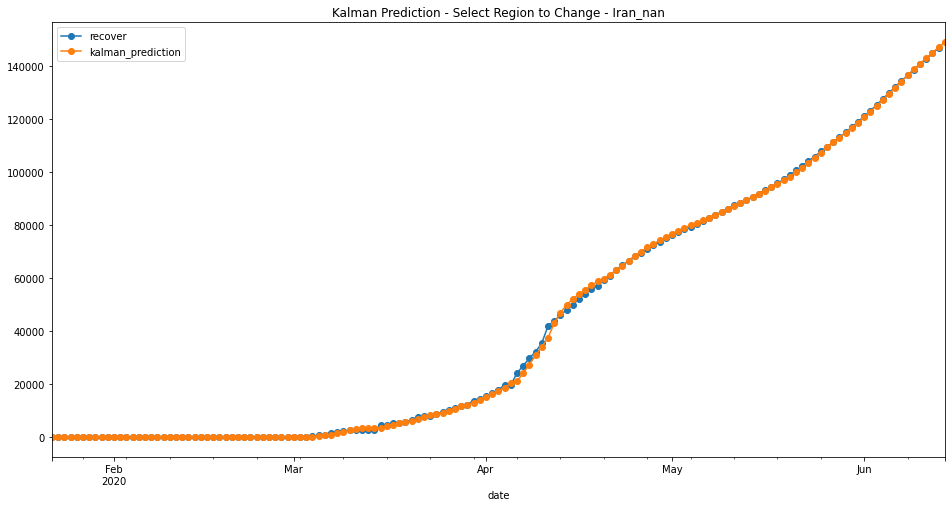

In [97]:
evaluationrec=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(trec)):
  if(trec.iloc[i,1] is not trec.iloc[i-1,1]):
    exrec=np.array(trec.iloc[i-len(ts):i,10])
    predrec=np.array(trec.iloc[i-len(ts):i,2])
    evaluationrec=evaluationrec.append({'region': trec.iloc[i-1,1], 'mse': np.power((exrec - predrec),2).mean(),'rmse':sqrt(mean_squared_error(exrec,predrec)),'mae': (abs(exrec - predrec)).mean()}, ignore_index=True)
prec=trec[trec['region']==region][['date','region','recover','kalman_prediction']]
prec.iloc[len(prec)-1,2]=None
prec=prec.set_index(['date'])
prec.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(prec.iloc[0,0]))
print(evaluationrec[evaluationrec['region']==prec.iloc[0,0]])
prec.tail(10)

In [98]:
pred_dif_rec = (prec["recover"] - prec["kalman_prediction"]).abs()
pred_dif_rec.tail(30)

date
2020-05-16    272.0
2020-05-17    295.0
2020-05-18    143.0
2020-05-19    357.0
2020-05-20    540.0
2020-05-21    679.0
2020-05-22    608.0
2020-05-23    565.0
2020-05-24    392.0
2020-05-25    425.0
2020-05-26    192.0
2020-05-27     55.0
2020-05-28     47.0
2020-05-29    167.0
2020-05-30    159.0
2020-05-31    256.0
2020-06-01    405.0
2020-06-02    341.0
2020-06-03    313.0
2020-06-04    402.0
2020-06-05    367.0
2020-06-06    335.0
2020-06-07    283.0
2020-06-08     87.0
2020-06-09    184.0
2020-06-10    172.0
2020-06-11    201.0
2020-06-12    273.0
2020-06-13    158.0
2020-06-14      NaN
dtype: float64

Empty DataFrame
Columns: [region, mse, rmse, mae]
Index: []


,region,confirmed,kalman_prediction
date,,,
2020-06-05,Ukraine_nan,26542.0,26453.0
2020-06-06,Ukraine_nan,27101.0,27039.0
2020-06-07,Ukraine_nan,27599.0,27621.0
2020-06-08,Ukraine_nan,28077.0,28161.0
2020-06-09,Ukraine_nan,28479.0,28659.0
2020-06-10,Ukraine_nan,29015.0,29086.0
2020-06-11,Ukraine_nan,29706.0,29553.0
2020-06-12,Ukraine_nan,30415.0,30148.0
2020-06-13,Ukraine_nan,31177.0,30836.0


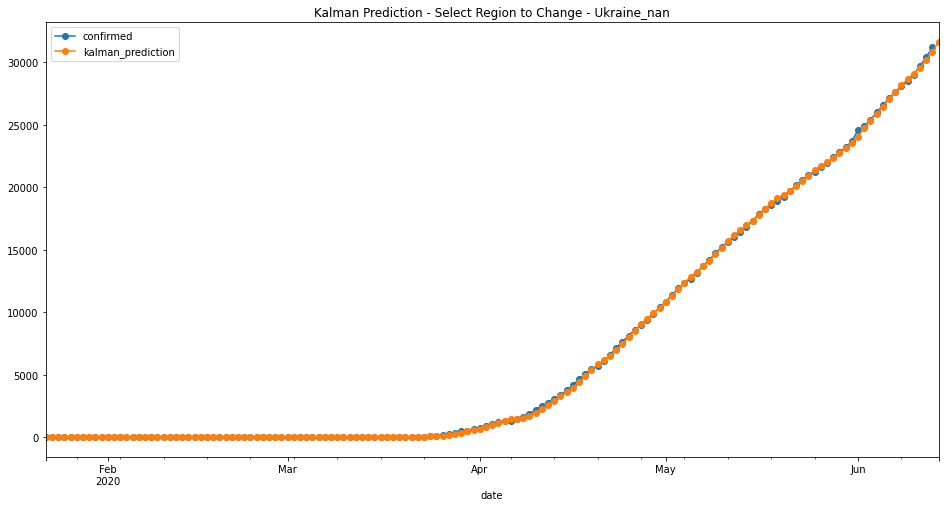

In [99]:
# Select region
region='Ukraine_nan'

evaluationconf=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(tconf)):
  if(tconf.iloc[i,1] is not tconf.iloc[i-1,1]):
    exconf=np.array(tconf.iloc[i-len(ts):i,10])
    predconf=np.array(tconf.iloc[i-len(ts):i,2])
    evaluationconf=evaluationconf.append({'region': tconf.iloc[i-1,1], 'mse': np.power((exconf - predconf),2).mean(),'rmse':sqrt(mean_squared_error(exconf,predconf)),'mae': (abs(exconf - predconf)).mean()}, ignore_index=True)
pconf=tconf[tconf['region']==region][['date','region','confirmed','kalman_prediction']]
pconf.iloc[len(pconf)-1,2]=None
pconf=pconf.set_index(['date'])
pconf.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(pconf.iloc[0,0]))
print(evaluationconf[evaluationconf['region']==pconf.iloc[0,0]])
pconf.tail(10)

In [100]:
pred_dif_conf = (pconf["confirmed"] - pconf["kalman_prediction"]).abs()
pred_dif_conf.tail(30)

date
2020-05-16     93.0
2020-05-17     35.0
2020-05-18    109.0
2020-05-19    234.0
2020-05-20    172.0
2020-05-21      8.0
2020-05-22     69.0
2020-05-23     81.0
2020-05-24     49.0
2020-05-25    122.0
2020-05-26    115.0
2020-05-27    112.0
2020-05-28     62.0
2020-05-29     97.0
2020-05-30     66.0
2020-05-31    114.0
2020-06-01    545.0
2020-06-02    136.0
2020-06-03     56.0
2020-06-04    112.0
2020-06-05     89.0
2020-06-06     62.0
2020-06-07     22.0
2020-06-08     84.0
2020-06-09    180.0
2020-06-10     71.0
2020-06-11    153.0
2020-06-12    267.0
2020-06-13    341.0
2020-06-14      NaN
dtype: float64

Empty DataFrame
Columns: [region, mse, rmse, mae]
Index: []


,region,death,kalman_prediction
date,,,
2020-06-05,Ukraine_nan,770.0,768.0
2020-06-06,Ukraine_nan,785.0,781.0
2020-06-07,Ukraine_nan,796.0,796.0
2020-06-08,Ukraine_nan,805.0,809.0
2020-06-09,Ukraine_nan,818.0,819.0
2020-06-10,Ukraine_nan,841.0,831.0
2020-06-11,Ukraine_nan,864.0,849.0
2020-06-12,Ukraine_nan,880.0,872.0
2020-06-13,Ukraine_nan,890.0,893.0


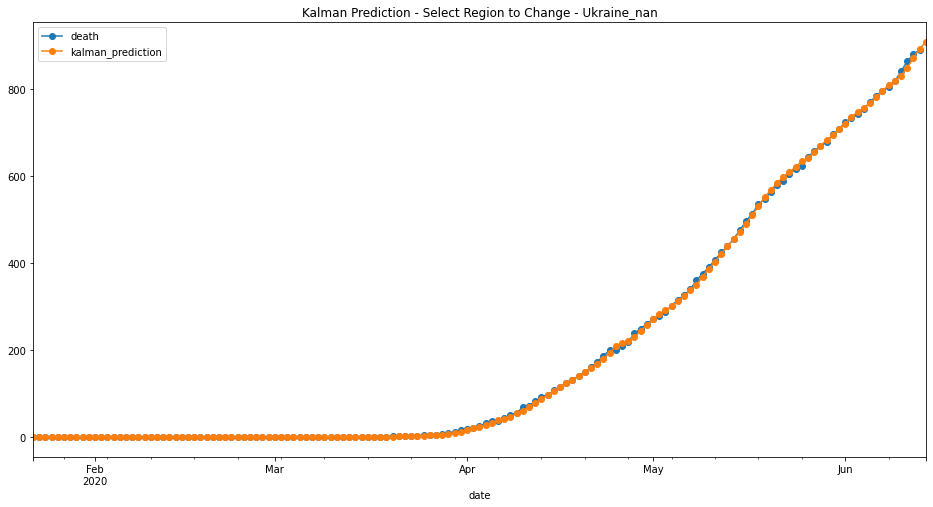

In [101]:
evaluationdeath=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(tdeath)):
  if(tdeath.iloc[i,1] is not tdeath.iloc[i-1,1]):
    exdeath=np.array(tdeath.iloc[i-len(ts):i,10])
    preddeath=np.array(tdeath.iloc[i-len(ts):i,2])
    evaluationdeath=evaluationdeath.append({'region': tdeath.iloc[i-1,1], 'mse': np.power((exdeath - preddeath),2).mean(),'rmse':sqrt(mean_squared_error(exdeath,preddeath)),'mae': (abs(exdeath - preddeath)).mean()}, ignore_index=True)
pdeath=tdeath[tdeath['region']==region][['date','region','death','kalman_prediction']]
pdeath.iloc[len(pdeath)-1,2]=None
pdeath=pdeath.set_index(['date'])
pdeath.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(pdeath.iloc[0,0]))
print(evaluationdeath[evaluationdeath['region']==pdeath.iloc[0,0]])
pdeath.tail(10)

In [102]:
pred_dif_death = (pdeath["death"] - pdeath["kalman_prediction"]).abs()
pred_dif_death.tail(30)

date
2020-05-16     6.0
2020-05-17     3.0
2020-05-18     4.0
2020-05-19     4.0
2020-05-20     4.0
2020-05-21     5.0
2020-05-22    11.0
2020-05-23     4.0
2020-05-24     5.0
2020-05-25    11.0
2020-05-26     3.0
2020-05-27     3.0
2020-05-28     1.0
2020-05-29     4.0
2020-05-30     2.0
2020-05-31     0.0
2020-06-01     3.0
2020-06-02     3.0
2020-06-03     6.0
2020-06-04     2.0
2020-06-05     2.0
2020-06-06     4.0
2020-06-07     0.0
2020-06-08     4.0
2020-06-09     1.0
2020-06-10    10.0
2020-06-11    15.0
2020-06-12     8.0
2020-06-13     3.0
2020-06-14     NaN
dtype: float64

Empty DataFrame
Columns: [region, mse, rmse, mae]
Index: []


,region,recover,kalman_prediction
date,,,
2020-06-05,Ukraine_nan,11815.0,11784.0
2020-06-06,Ukraine_nan,12265.0,12242.0
2020-06-07,Ukraine_nan,12513.0,12699.0
2020-06-08,Ukraine_nan,12657.0,13031.0
2020-06-09,Ukraine_nan,12892.0,13220.0
2020-06-10,Ukraine_nan,13257.0,13382.0
2020-06-11,Ukraine_nan,13642.0,13620.0
2020-06-12,Ukraine_nan,14075.0,13931.0
2020-06-13,Ukraine_nan,14489.0,14320.0


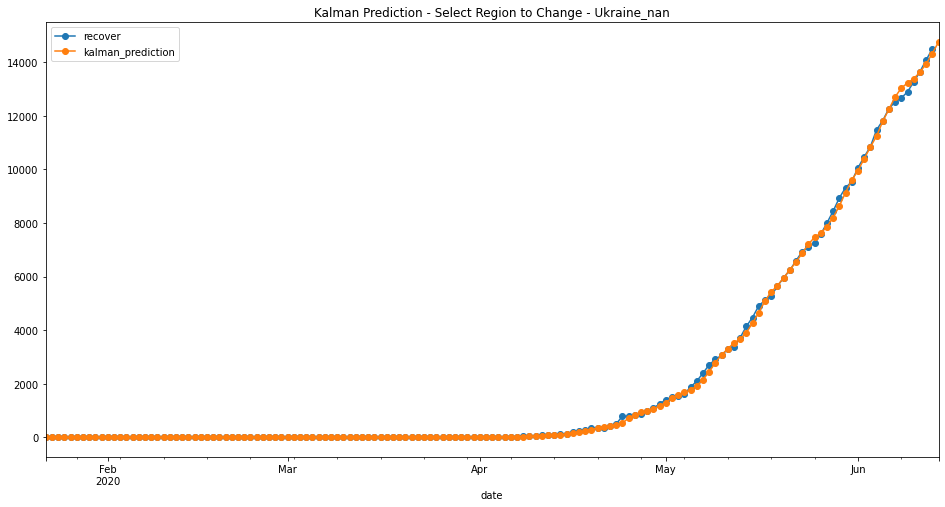

In [103]:
evaluationrec=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(trec)):
  if(trec.iloc[i,1] is not trec.iloc[i-1,1]):
    exrec=np.array(trec.iloc[i-len(ts):i,10])
    predrec=np.array(trec.iloc[i-len(ts):i,2])
    evaluationrec=evaluationrec.append({'region': trec.iloc[i-1,1], 'mse': np.power((exrec - predrec),2).mean(),'rmse':sqrt(mean_squared_error(exrec,predrec)),'mae': (abs(exrec - predrec)).mean()}, ignore_index=True)
prec=trec[trec['region']==region][['date','region','recover','kalman_prediction']]
prec.iloc[len(prec)-1,2]=None
prec=prec.set_index(['date'])
prec.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(prec.iloc[0,0]))
print(evaluationrec[evaluationrec['region']==prec.iloc[0,0]])
prec.tail(10)

In [104]:
pred_dif_rec = (prec["recover"] - prec["kalman_prediction"]).abs()
pred_dif_rec.tail(30)

date
2020-05-16    261.0
2020-05-17     28.0
2020-05-18    149.0
2020-05-19     25.0
2020-05-20     11.0
2020-05-21     22.0
2020-05-22     49.0
2020-05-23     66.0
2020-05-24    100.0
2020-05-25    226.0
2020-05-26     45.0
2020-05-27    137.0
2020-05-28    237.0
2020-05-29    307.0
2020-05-30    180.0
2020-05-31     64.0
2020-06-01    104.0
2020-06-02     71.0
2020-06-03     12.0
2020-06-04    232.0
2020-06-05     31.0
2020-06-06     23.0
2020-06-07    186.0
2020-06-08    374.0
2020-06-09    328.0
2020-06-10    125.0
2020-06-11     22.0
2020-06-12    144.0
2020-06-13    169.0
2020-06-14      NaN
dtype: float64